In [1]:
import os  
import sys  
import pandas as pd
import openpyxl
 
# get the current working directory  
cwd = os.getcwd()  
print("Current working directory:", cwd)  
  
# change the current working directory to one level up  
os.chdir("..")  
  
# get the new current working directory  
new_cwd = os.getcwd()  
print("New current working directory:", new_cwd)  

Current working directory: /home/runner/work/myfinance/myfinance/NT
New current working directory: /home/runner/work/myfinance/myfinance


In [2]:
sys.path.append(os.path.abspath("data"))
from relative import *
from AT_funs import *
# add the 'data' folder to the system path  


In [3]:

filename = 'data/A2A.MI.xlsx'
df = read_xlsx(filename)
ticker = filename.replace('xlsx', '')
# df
filename_bm = 'data/FTSEMIB.MI.xlsx'
bm_df = read_xlsx(filename_bm)
bm_name = filename_bm.replace('xlsx', '')

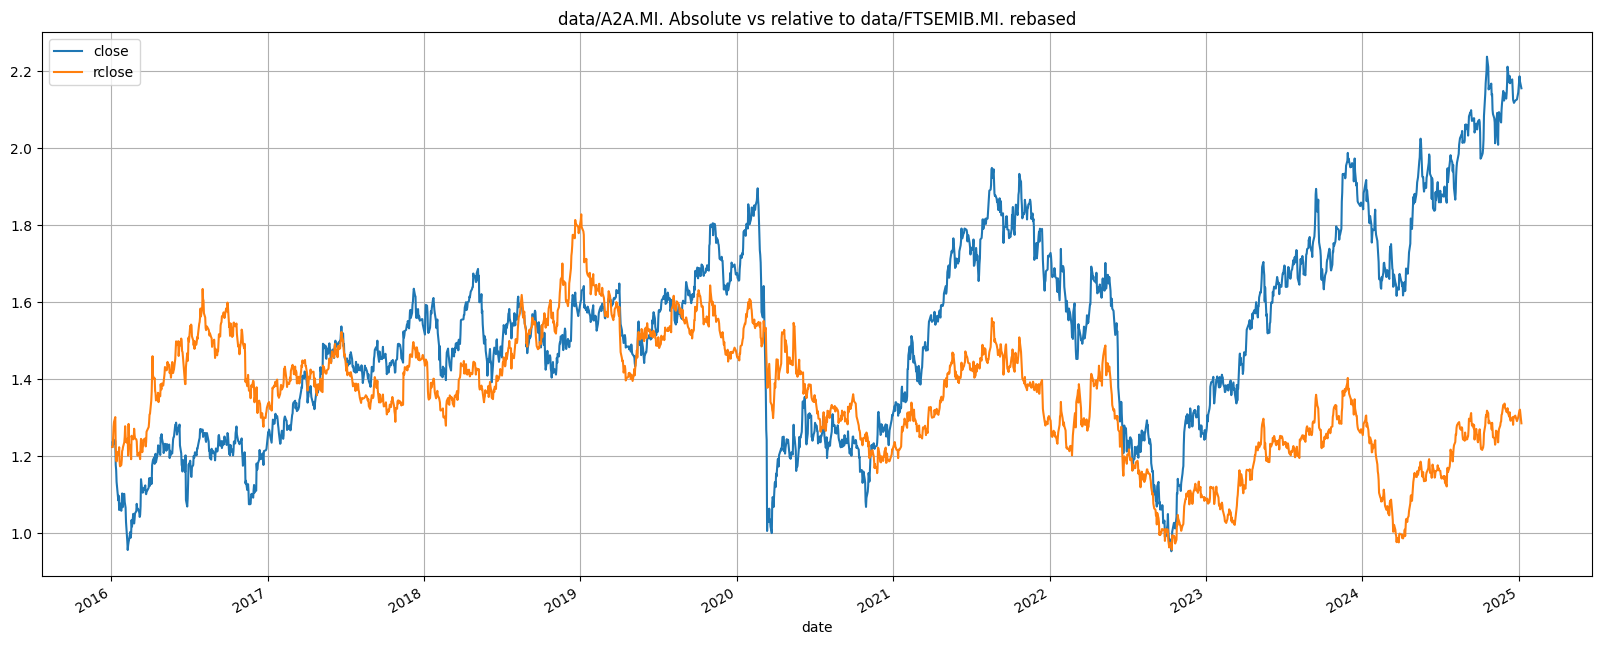

In [4]:
plot_abs_rel(df, ticker, bm_df, bm_name)

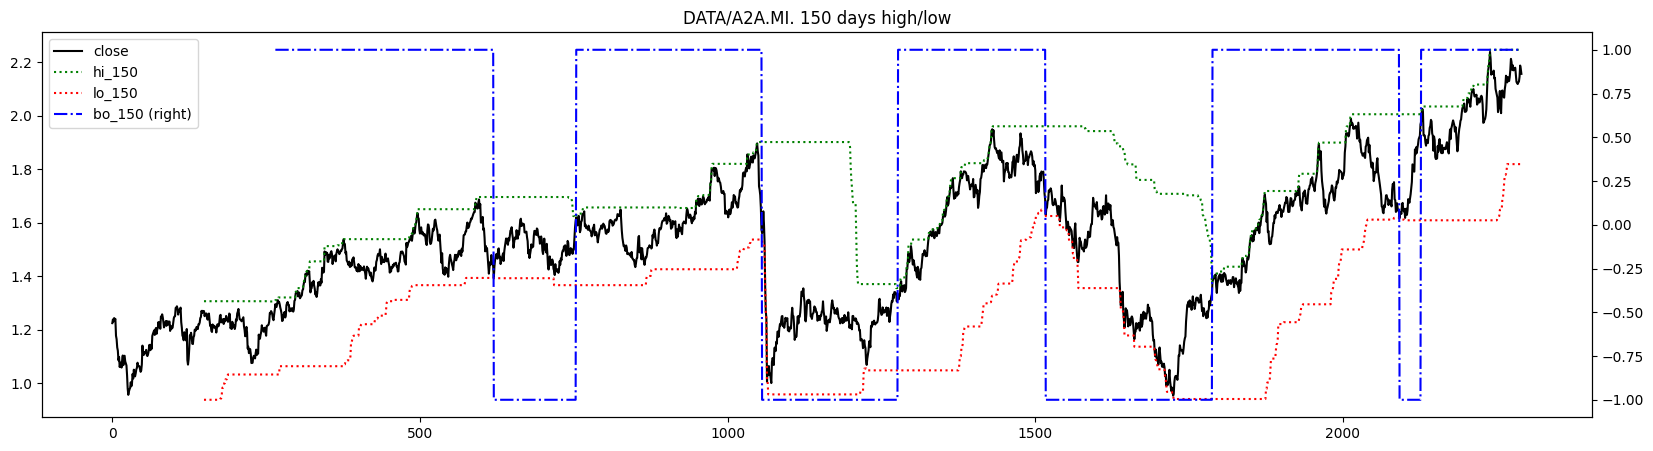

In [5]:
window_bo = 150
df_bo = df.copy()
df_bo = signal_bo(df_bo, window_bo)
bo_signal = 'bo_' + str(window_bo)
plot_signal_bo(df_bo, window_bo, ticker)

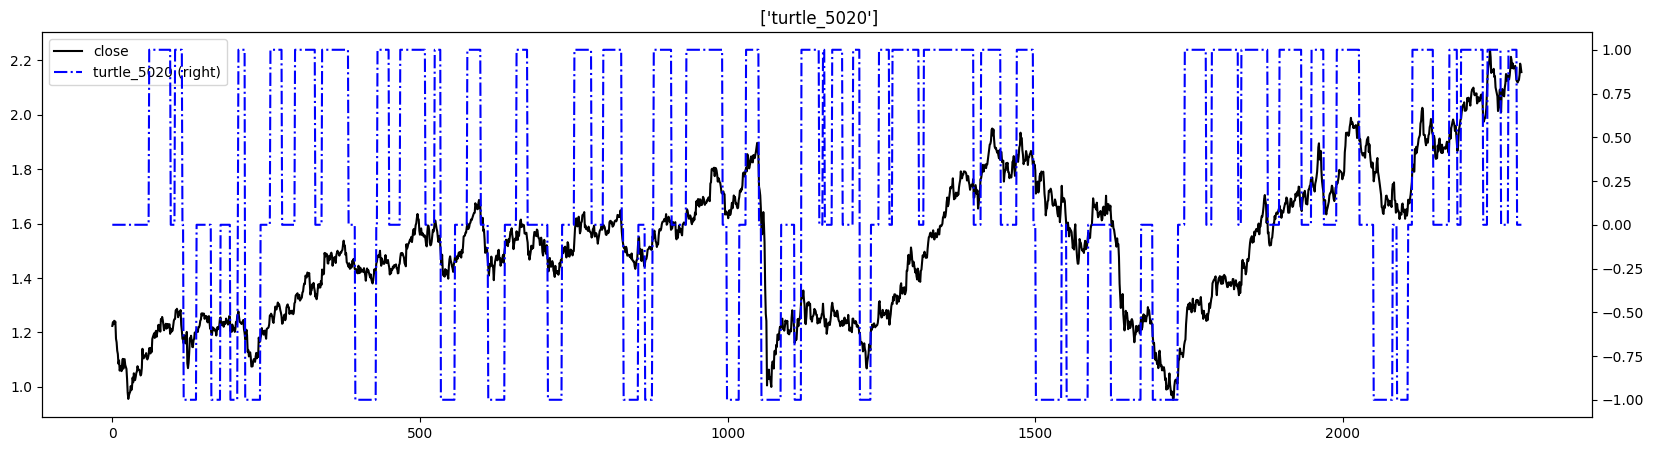

In [6]:
fast = 20
slow = 50
df_tt = df.copy()
df_tt = signal_tt(df_tt, fast = fast, slow = slow)
tt_signal = 'turtle_' + str(slow) + str(fast)
plot_signal_tt(df_tt, fast, slow)

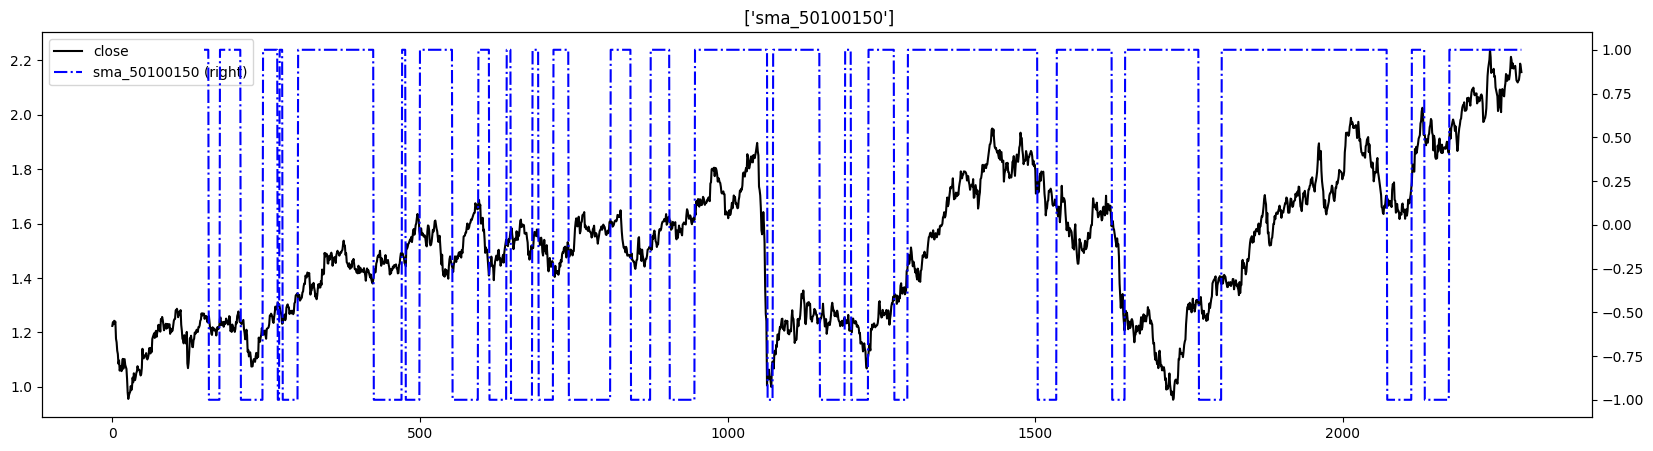

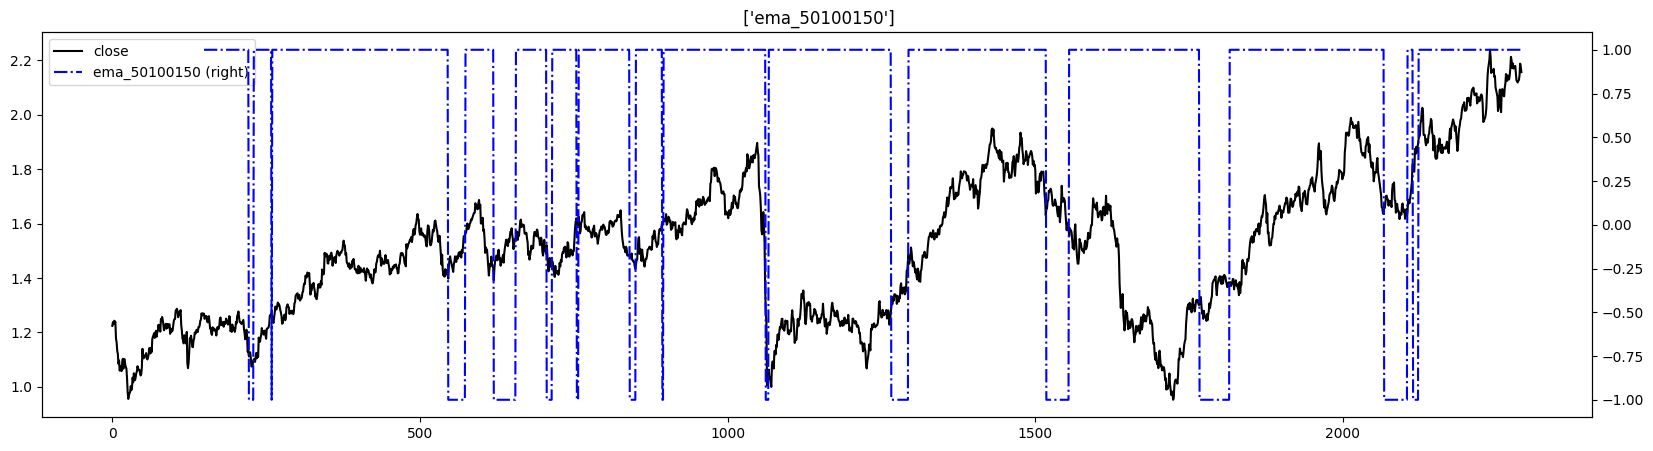

In [7]:
st = 50
mt = 100
lt = 150
df_ma = df.copy()
df_ma = signal_sma(df_ma, st, mt, lt)
df_ma = signal_ema(df_ma, st, mt, lt)

sma_signal = 'sma_' + str(st) + str(mt) + str(lt)
ema_signal = 'ema_' + str(st) + str(mt) + str(lt)

plot_signal_ma(df_ma, st, mt, lt)

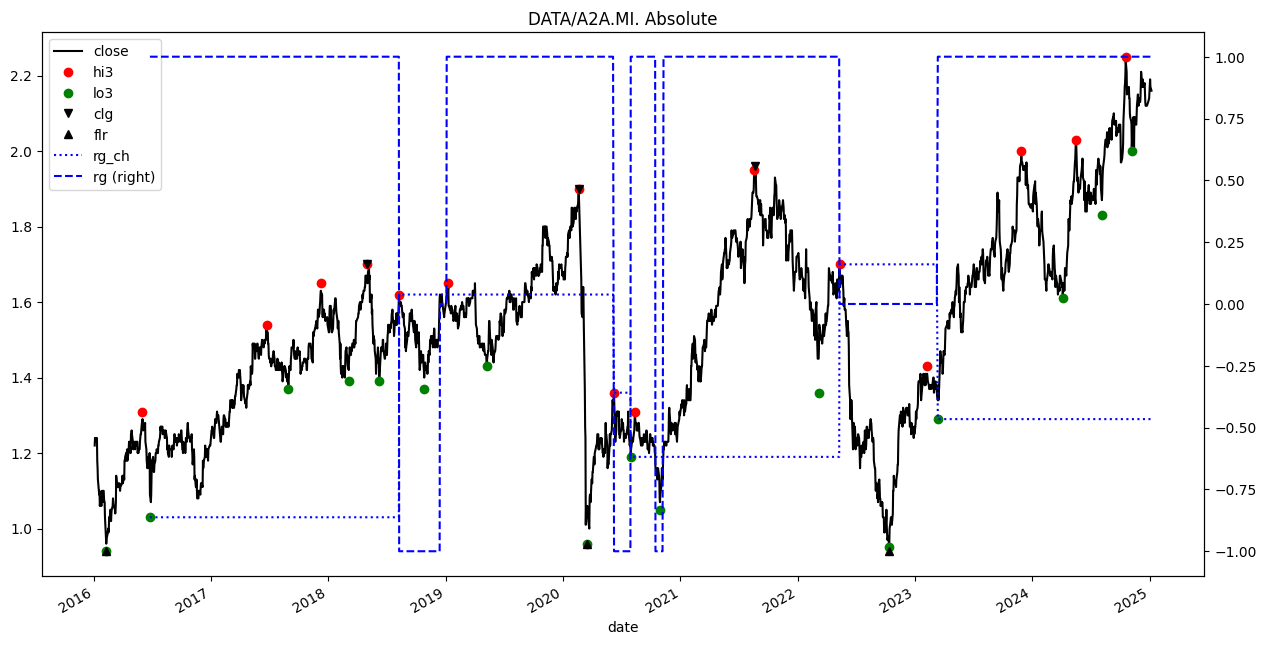

In [8]:
df_fc = df.copy()
df_fc = detect_regime(df_fc, bm_df)
fc_signal = 'rg'
fcr_signal = 'rrg'
plot_signal_abs(df_fc, ticker)

1
1


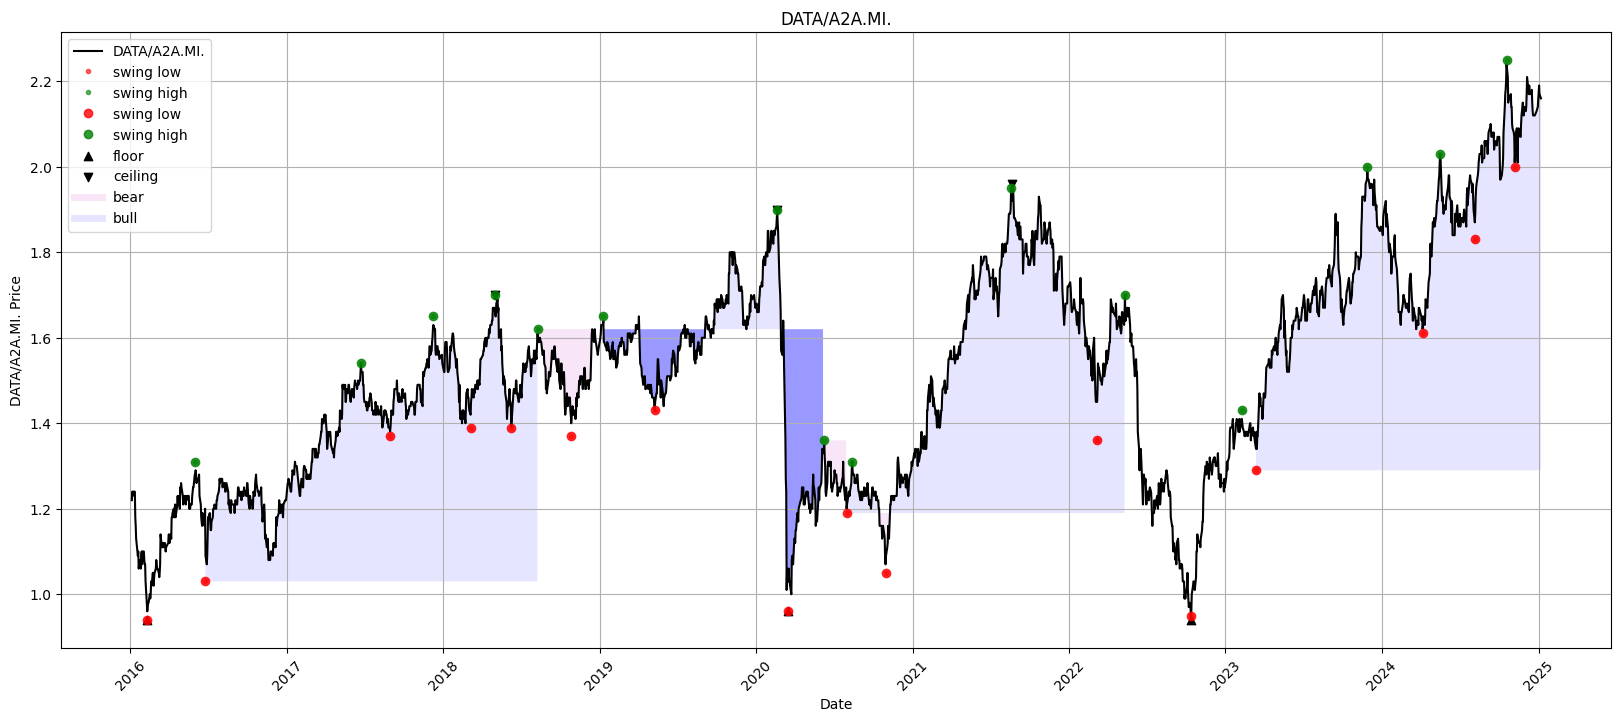

In [9]:
plot_regime_abs(df_fc, ticker)

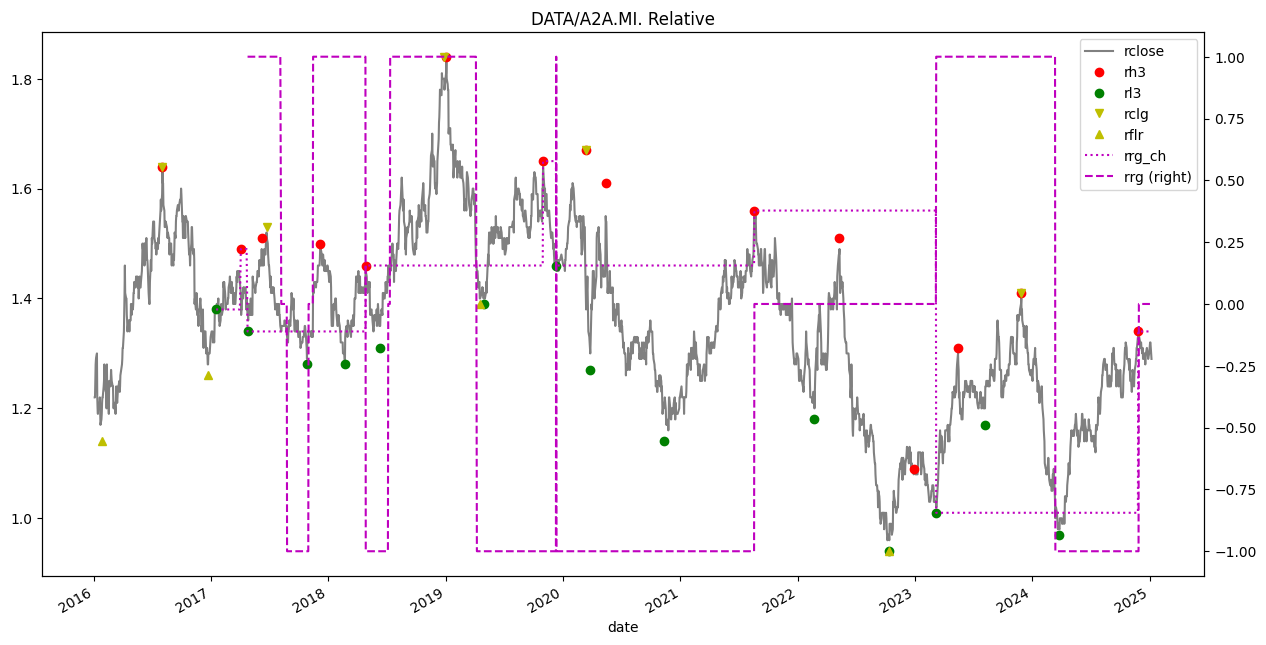

In [10]:
plot_signal_rel(df_fc, ticker)

1
1


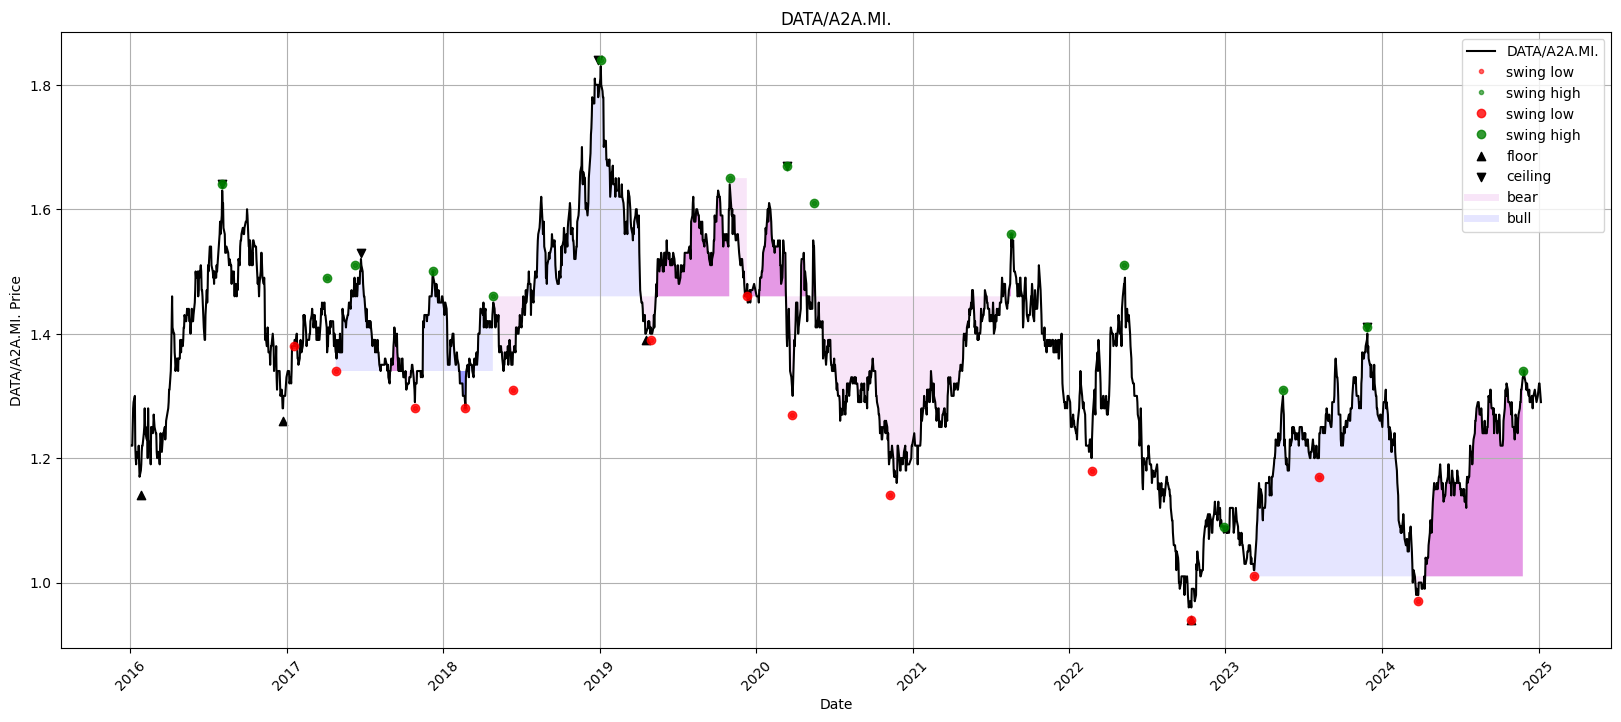

In [11]:
plot_regime_rel(df_fc, ticker)

In [12]:
method = ['breakout', 'turtle', 'sma', 'ema', 'floor_ceiling', 'floor_ceiling_relative']
signal = [bo_signal, tt_signal, sma_signal, ema_signal, fc_signal, fcr_signal]
df_signal = [df_bo, df_tt, df_ma, df_ma, df_fc, df_fc]

# method = ['turtle']
# signal = [tt_signal]
# df_signal = [df_tt]

In [13]:
def get_df_signal(df_signal, signal, window_exp):
    df_signal = df_signal.copy()
    df_signal = get_returns(df_signal, signal)
    df_signal = get_expectancies(df_signal, window_exp)
    return df_signal
    

In [14]:
window_exp = 100  # set the value of window_exp  
output_signals = []  # create an empty list to hold the output dataframes  
  
for i in range(len(signal)):  
    df = df_signal[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_df_signal(df, s, window_exp)  # call the function on the ith dataframe and signal  
    output_df['method'] = str(m)  # create a new column in output_df with the signal name  
    output_signals.append(output_df)  # append the output dataframe to the list  
  
# output_signals now contains the processed dataframes with the signal column added  


In [15]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'close', 'stop_loss','tt_cumul']]
output_df_sel.groupby('method').last() 

close  stop_loss  tt_cumul
method                                            
breakout                2.156      2.089  0.584730
ema                     2.156      2.089  0.255258
floor_ceiling           2.160      2.090  1.870588
floor_ceiling_relative  2.160      2.150 -0.190530
sma                     2.156      2.089  0.164689
turtle                  2.156      2.054  0.013777

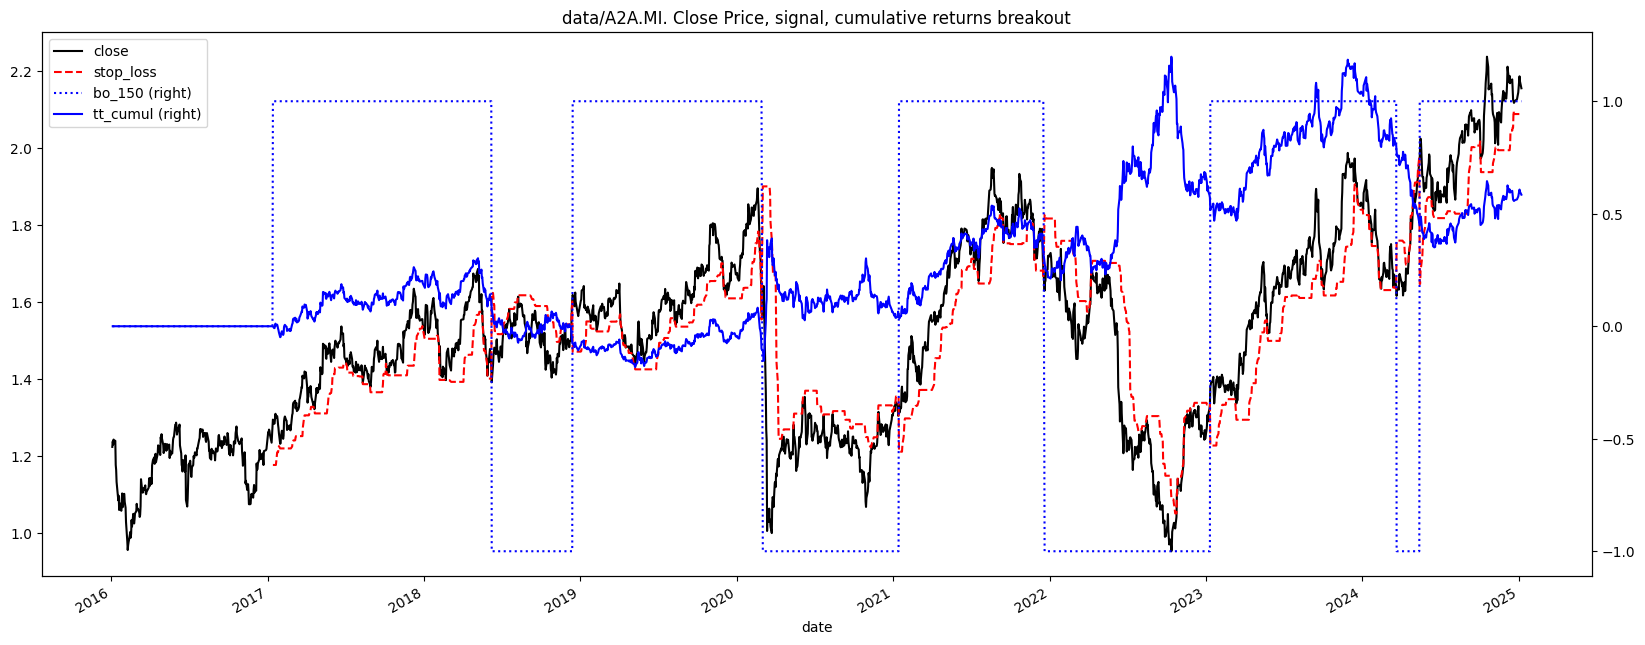

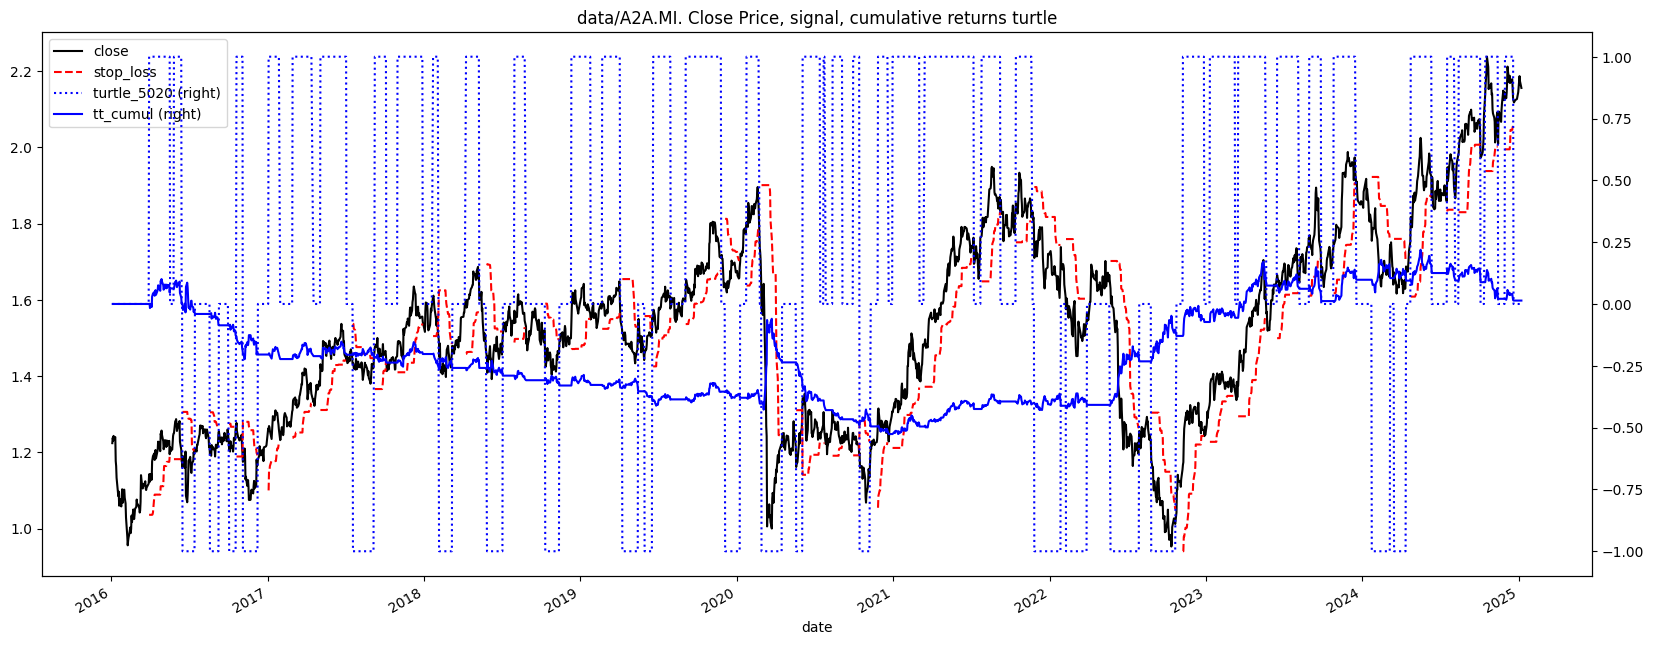

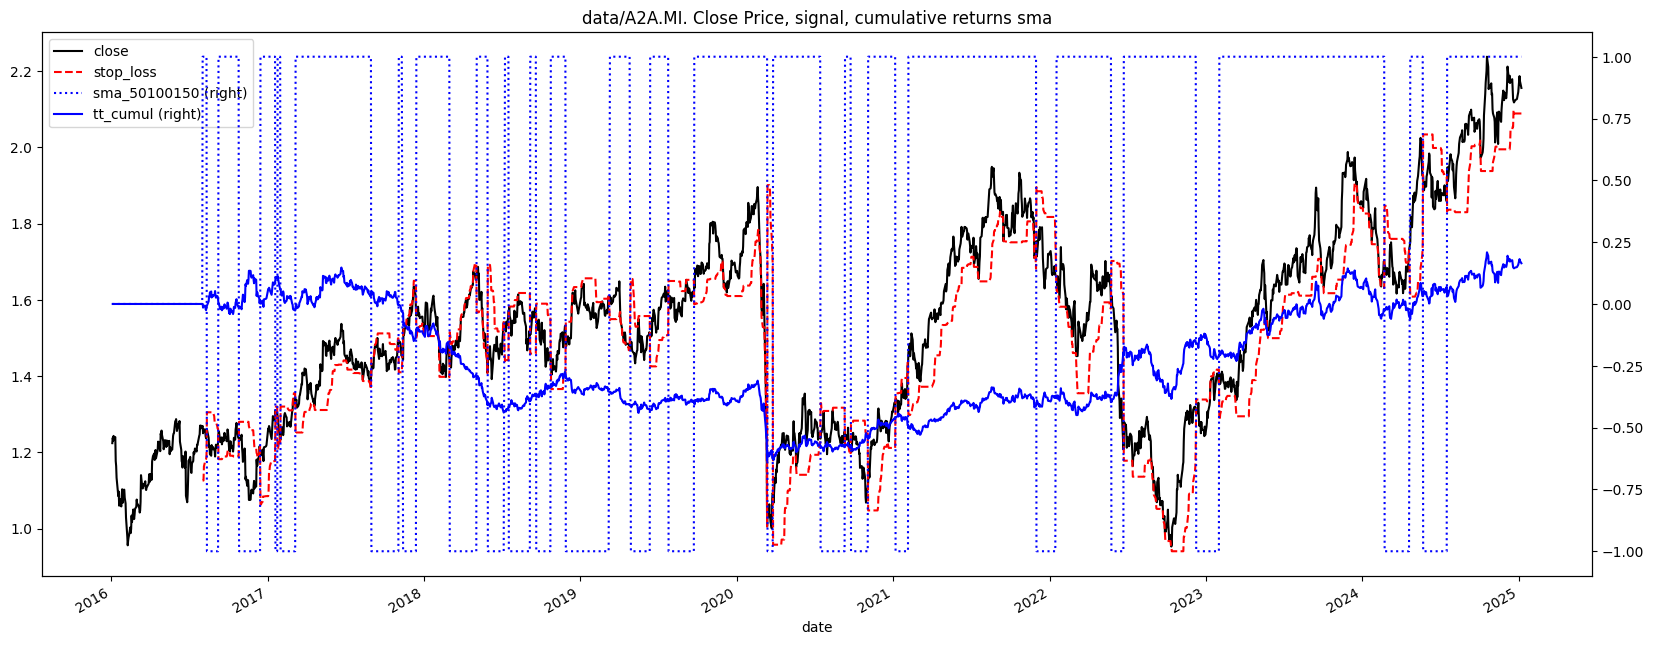

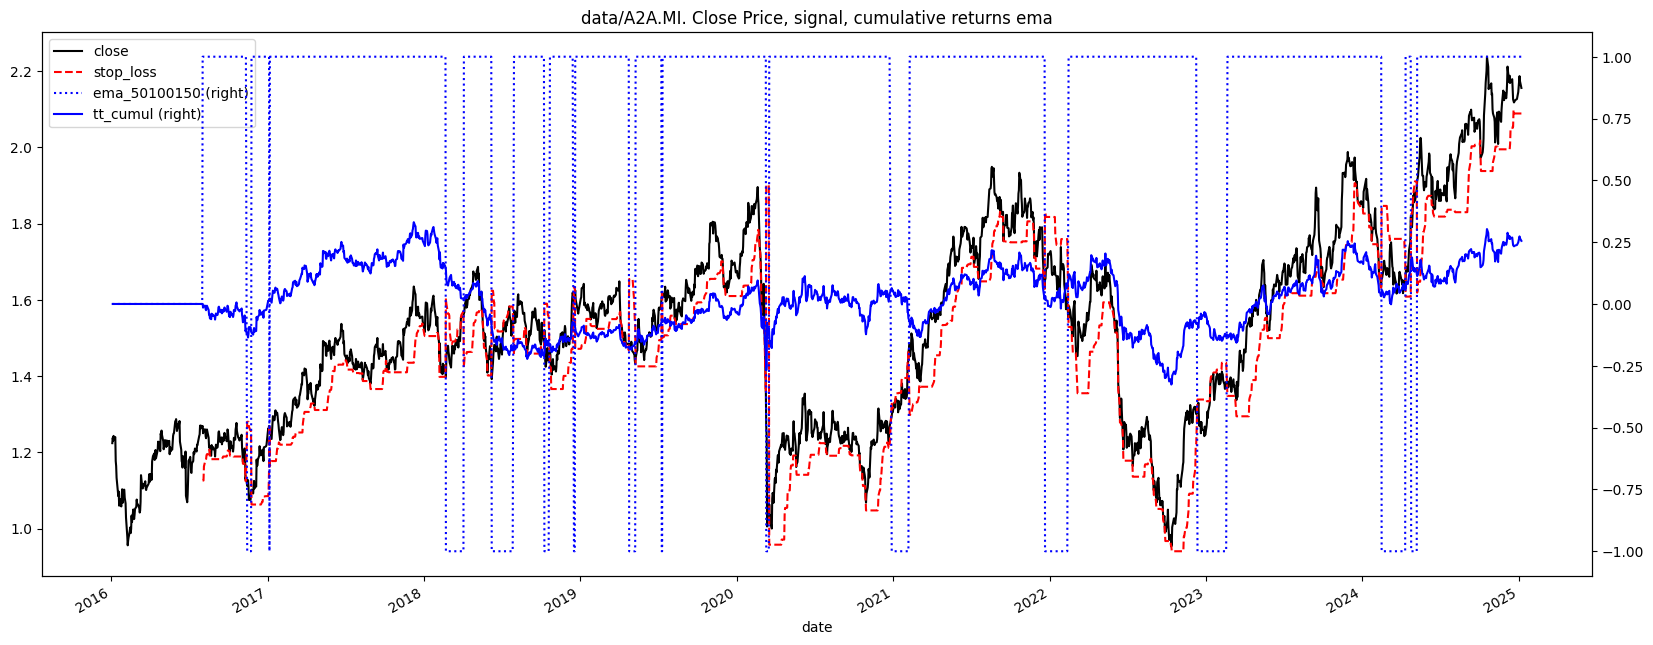

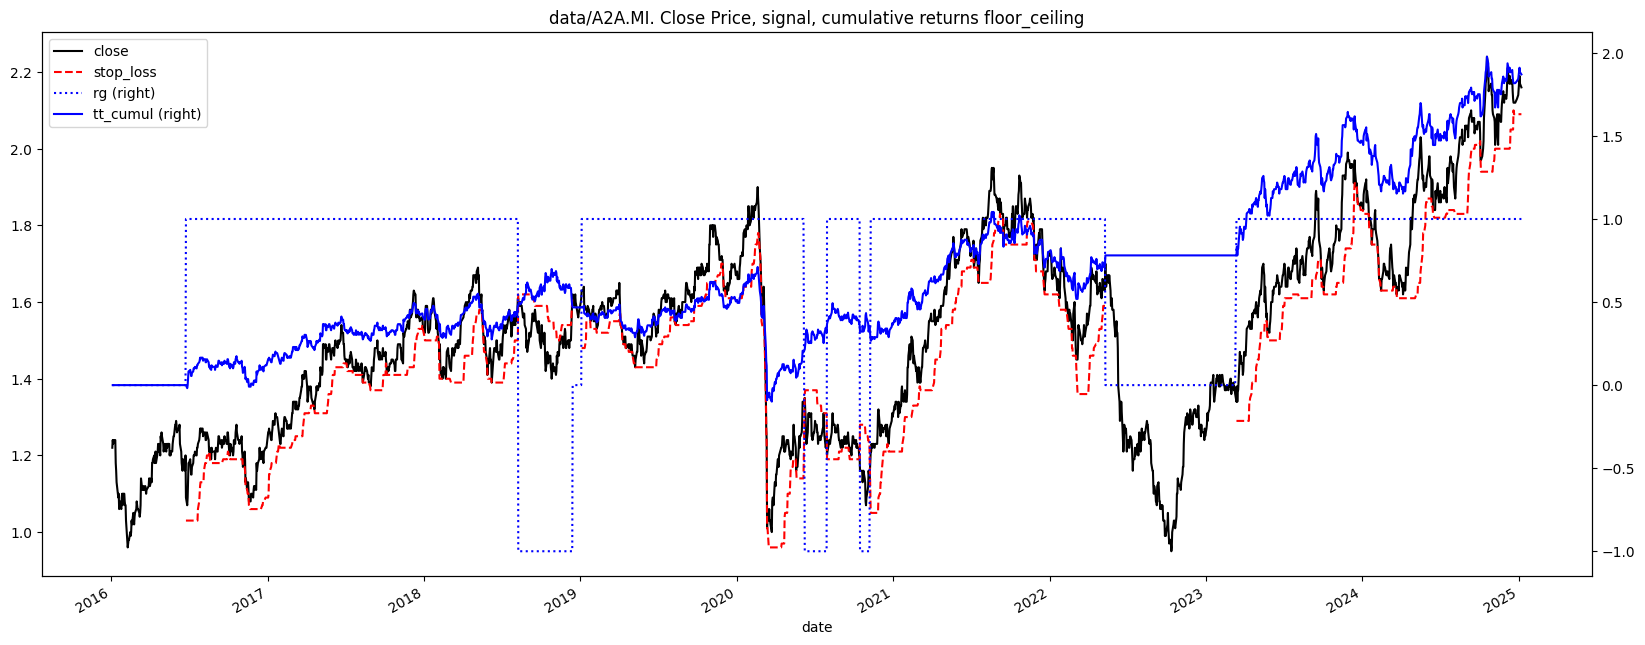

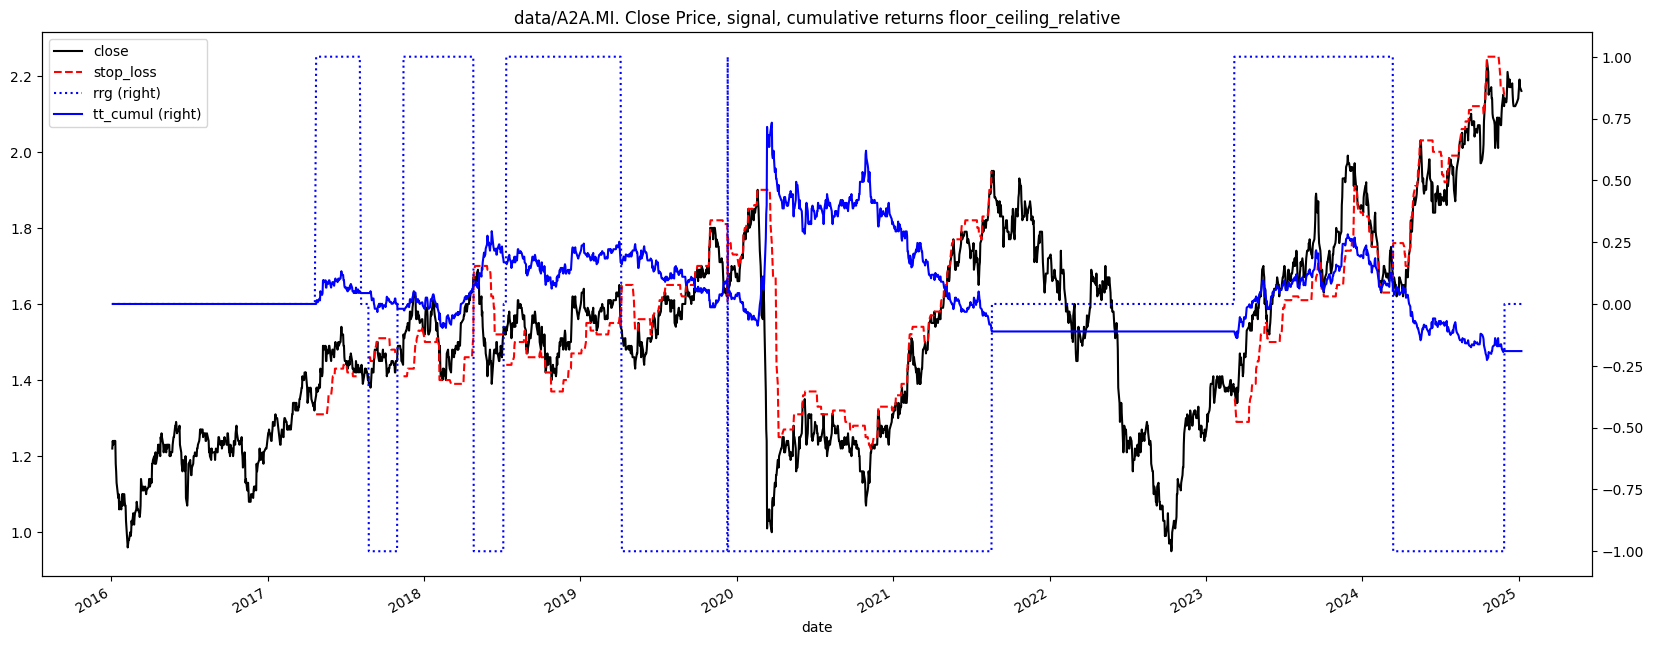

In [16]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_price_signal_cumreturns(df, ticker, s, m)

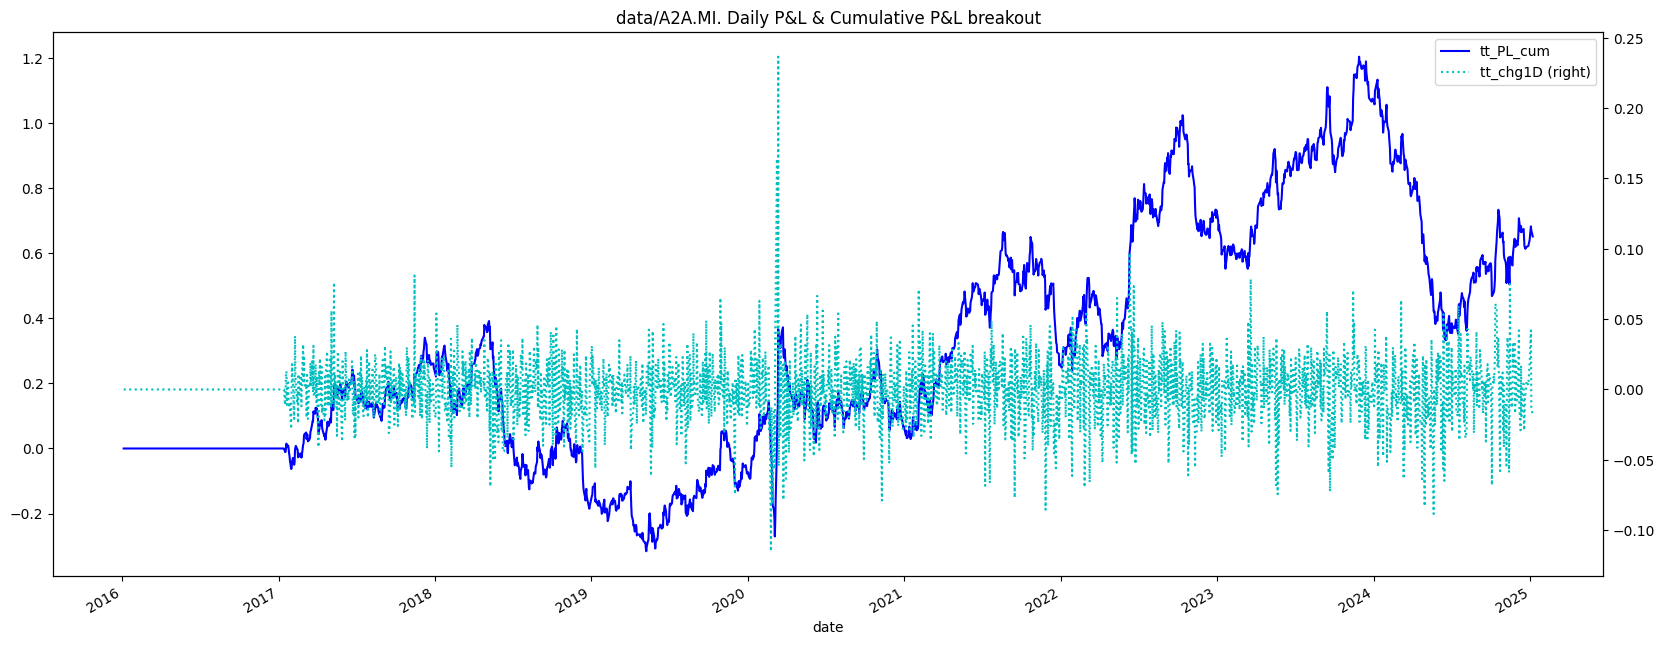

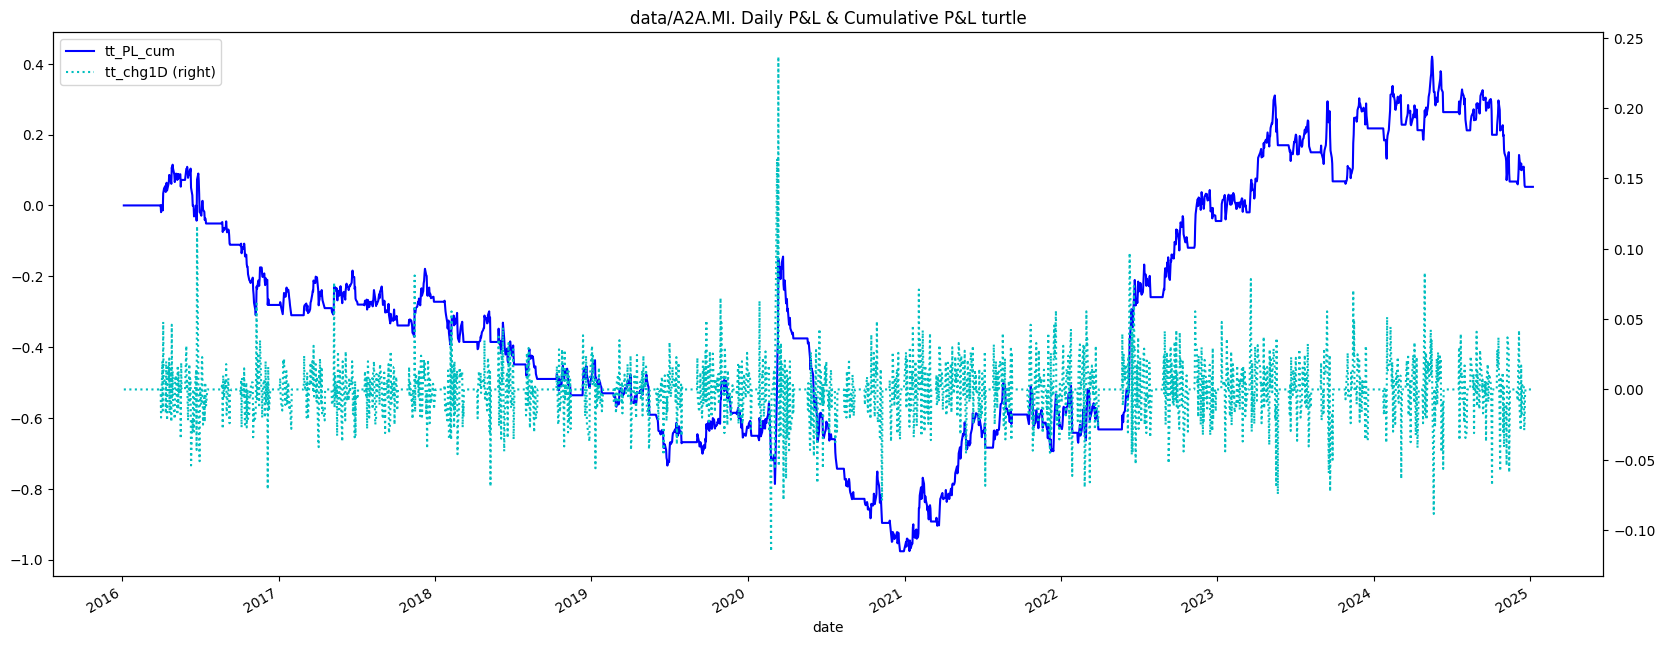

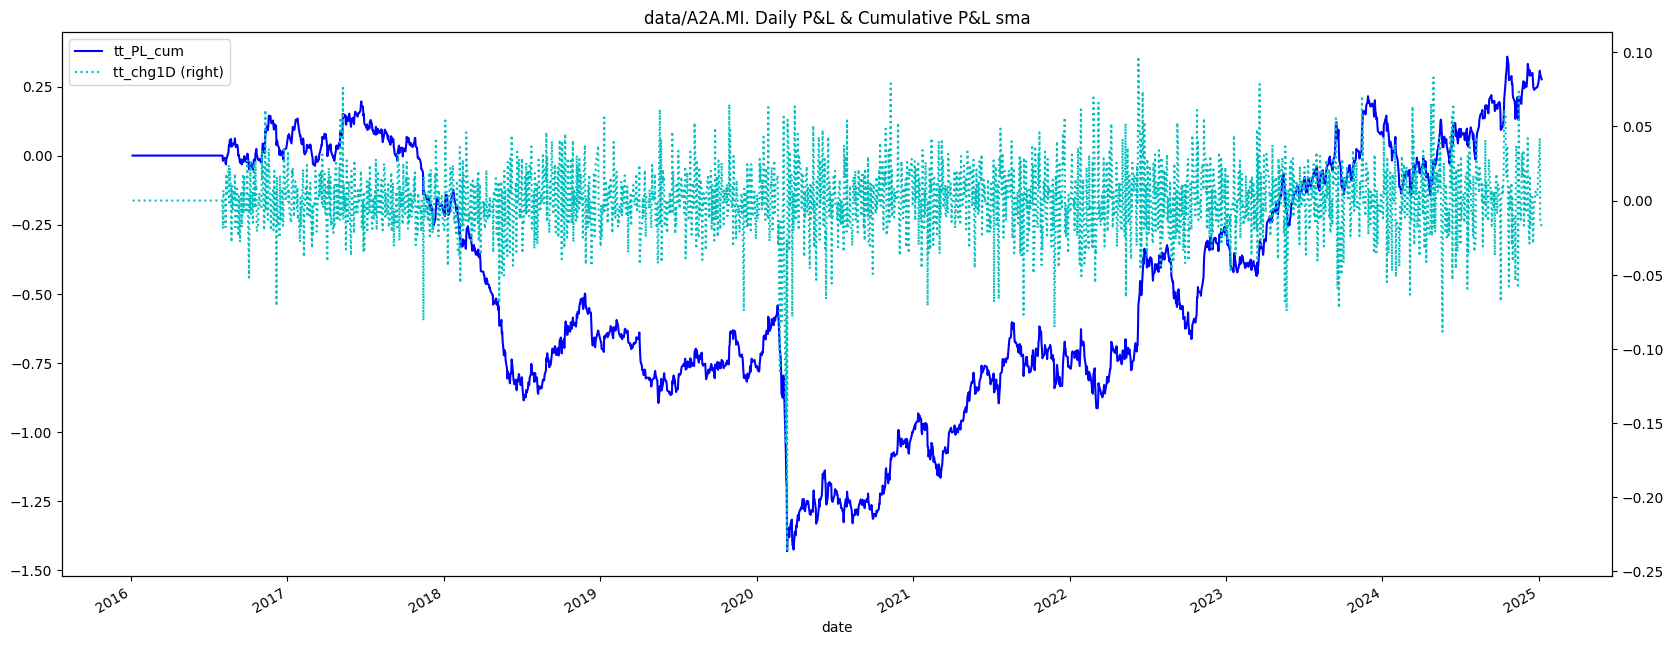

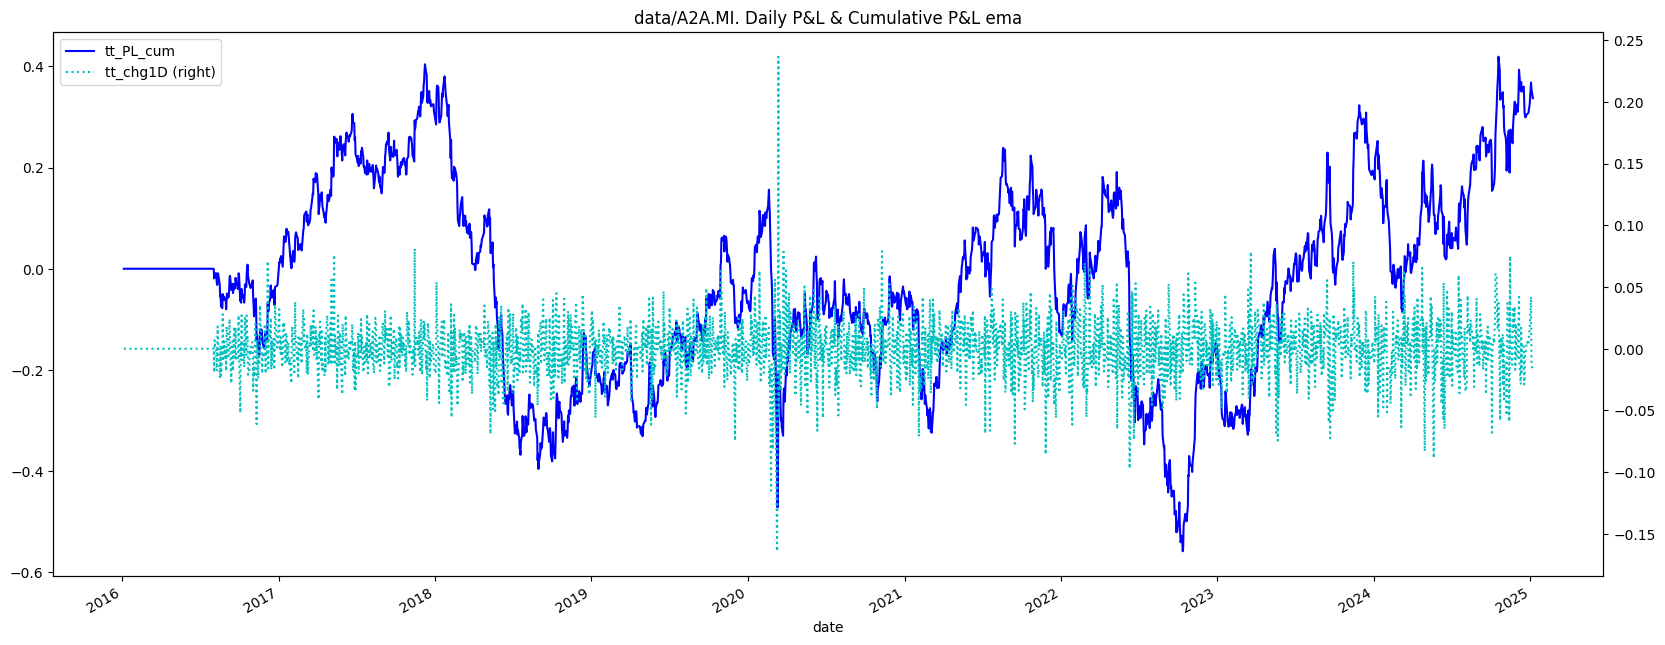

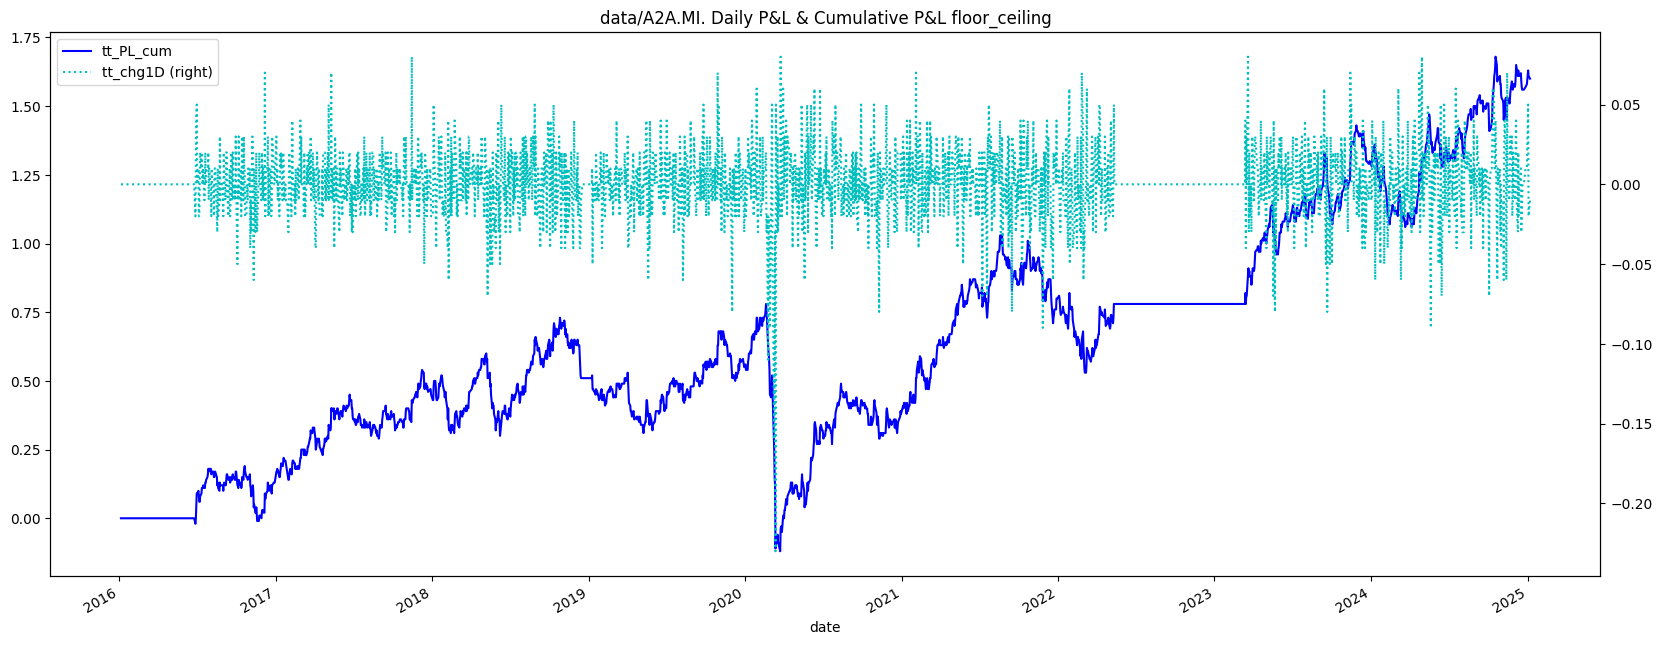

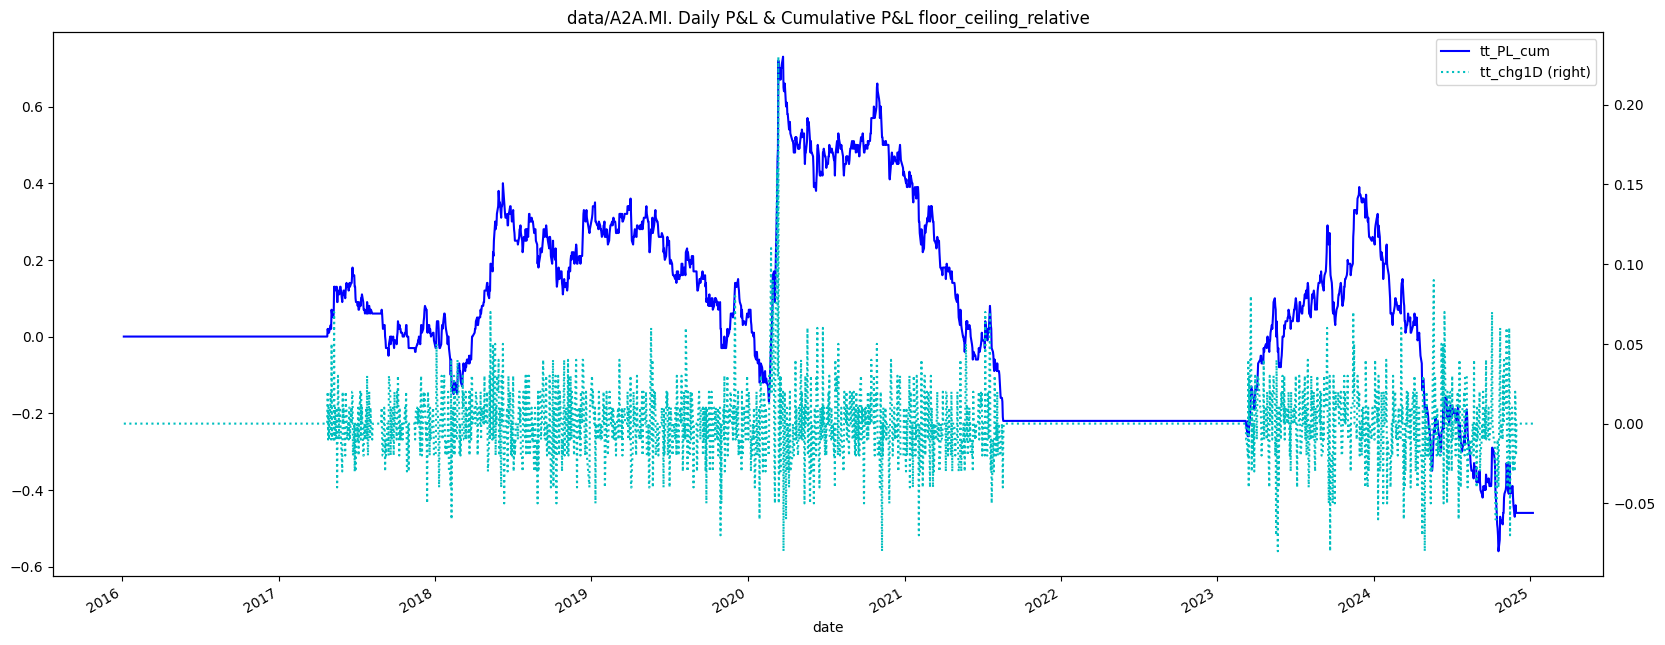

In [17]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_PL(df, ticker, m)

In [18]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'trading_edge','geometric_expectancy','kelly']]
output_df_sel.groupby('method').last() 

trading_edge  geometric_expectancy       kelly
method                                                                
breakout                    0.000991              0.000982   53.205990
ema                         0.000991              0.000982   53.205990
floor_ceiling               0.001878              0.001869  100.504593
floor_ceiling_relative      0.000345              0.000339   27.563218
sma                         0.000991              0.000982   53.205990
turtle                      0.000529              0.000524   57.925549

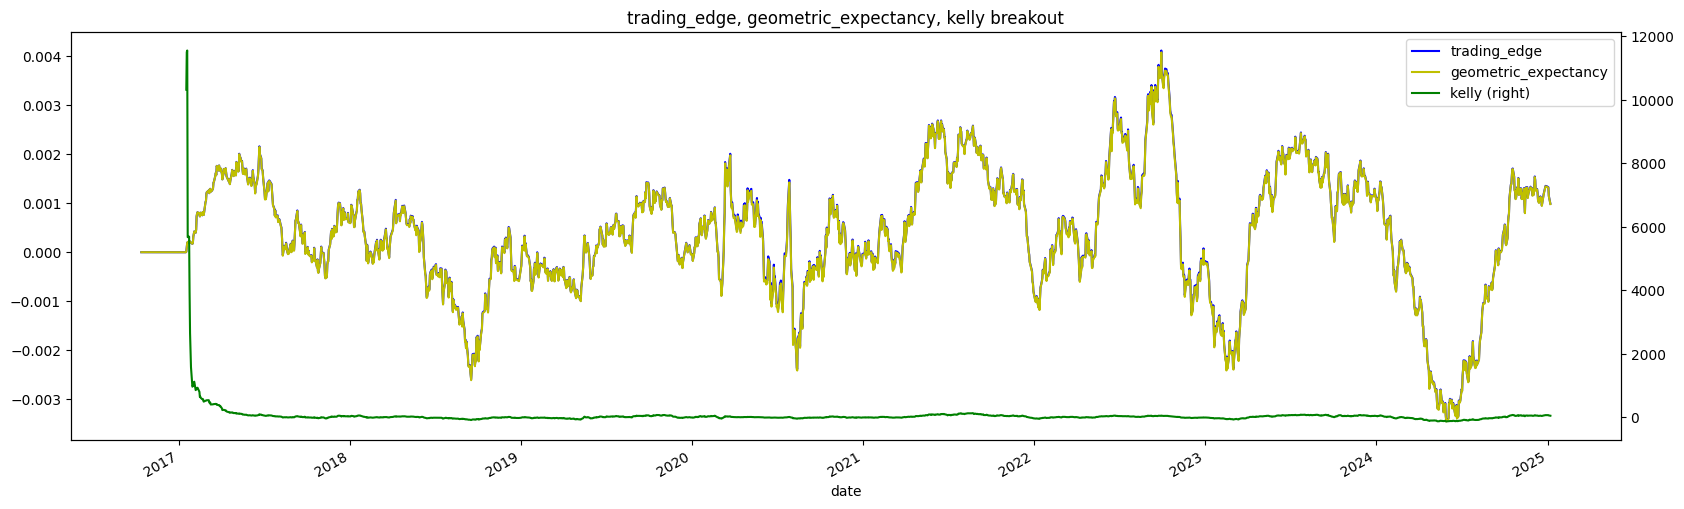

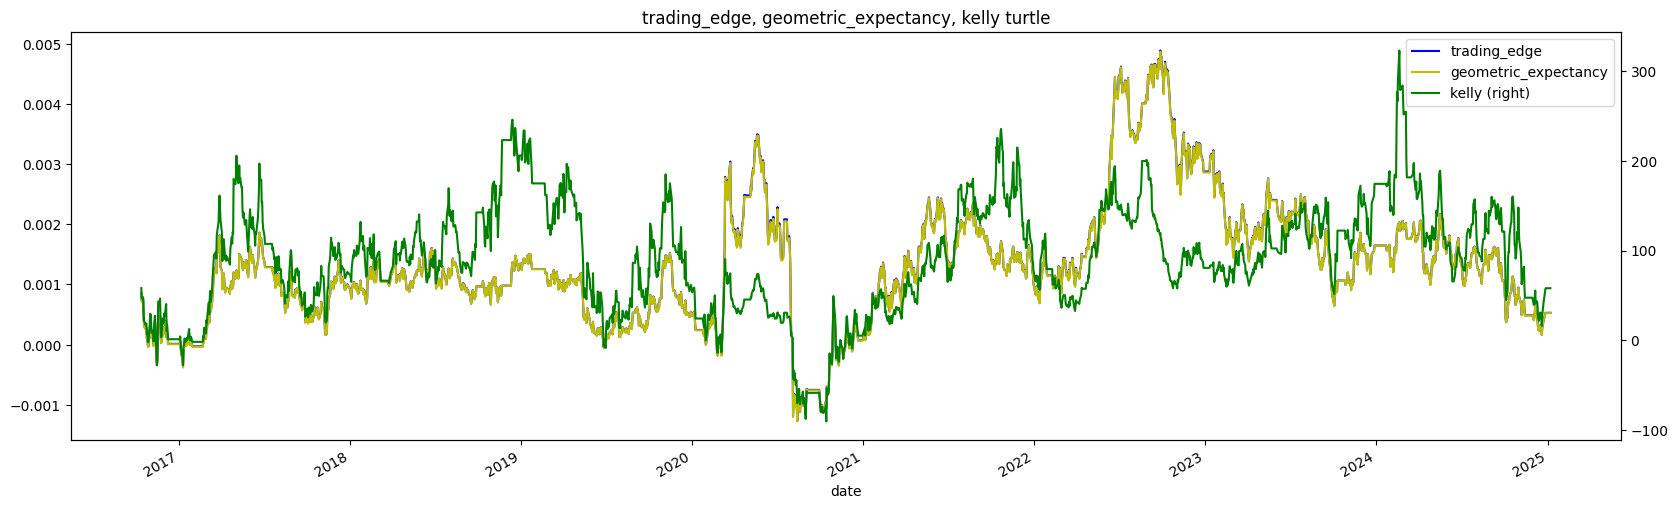

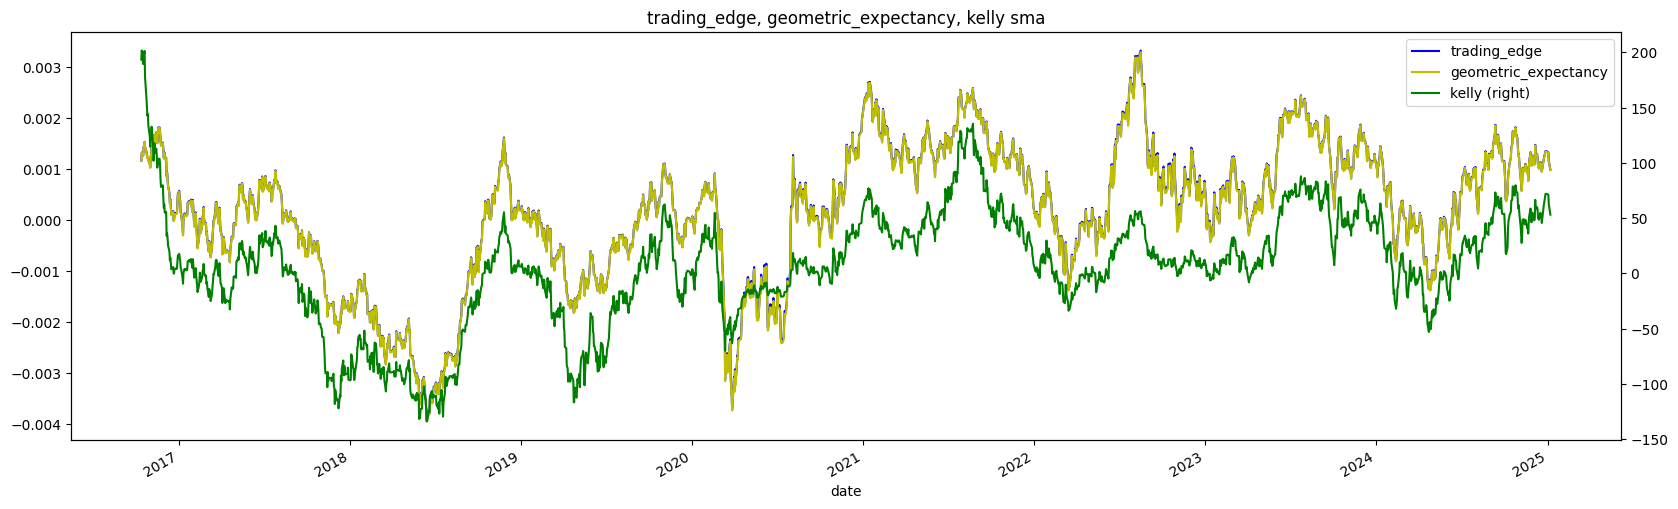

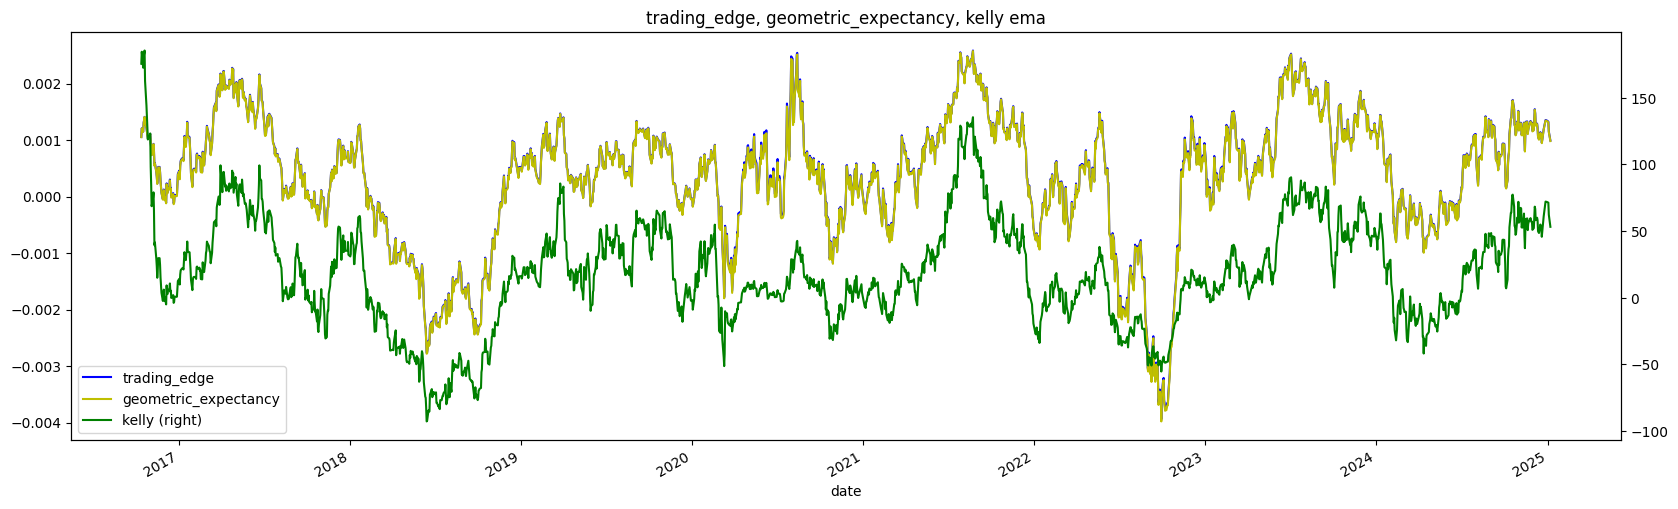

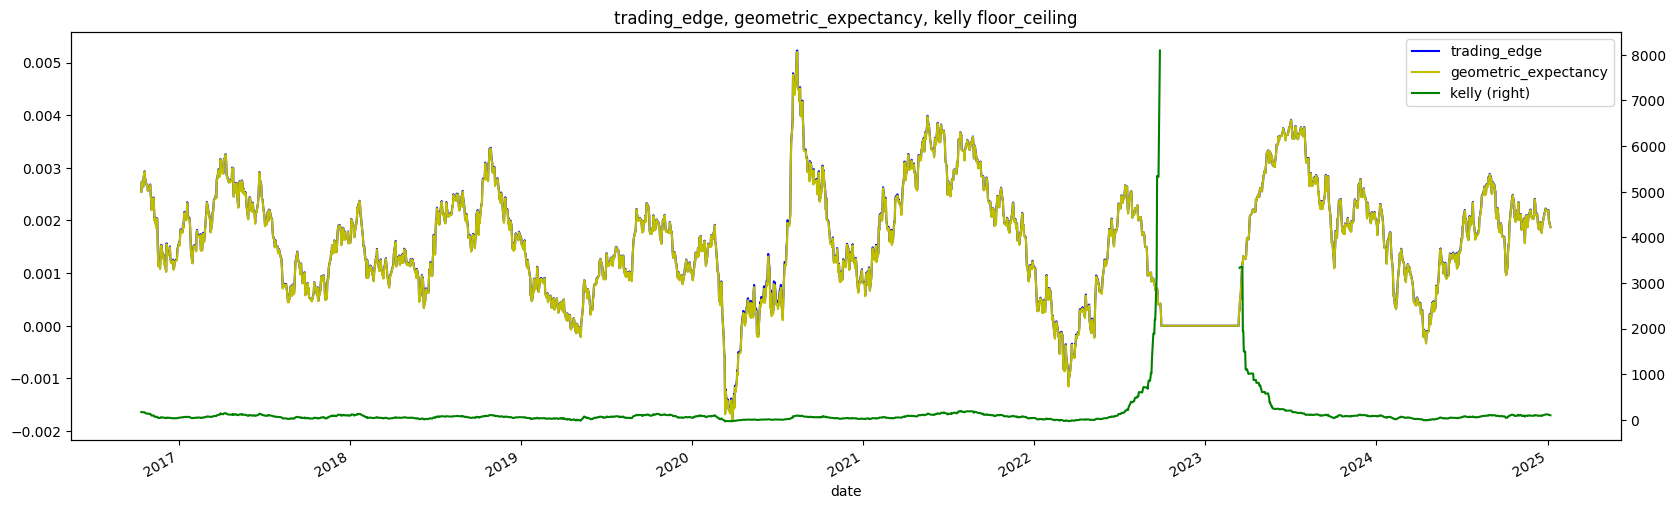

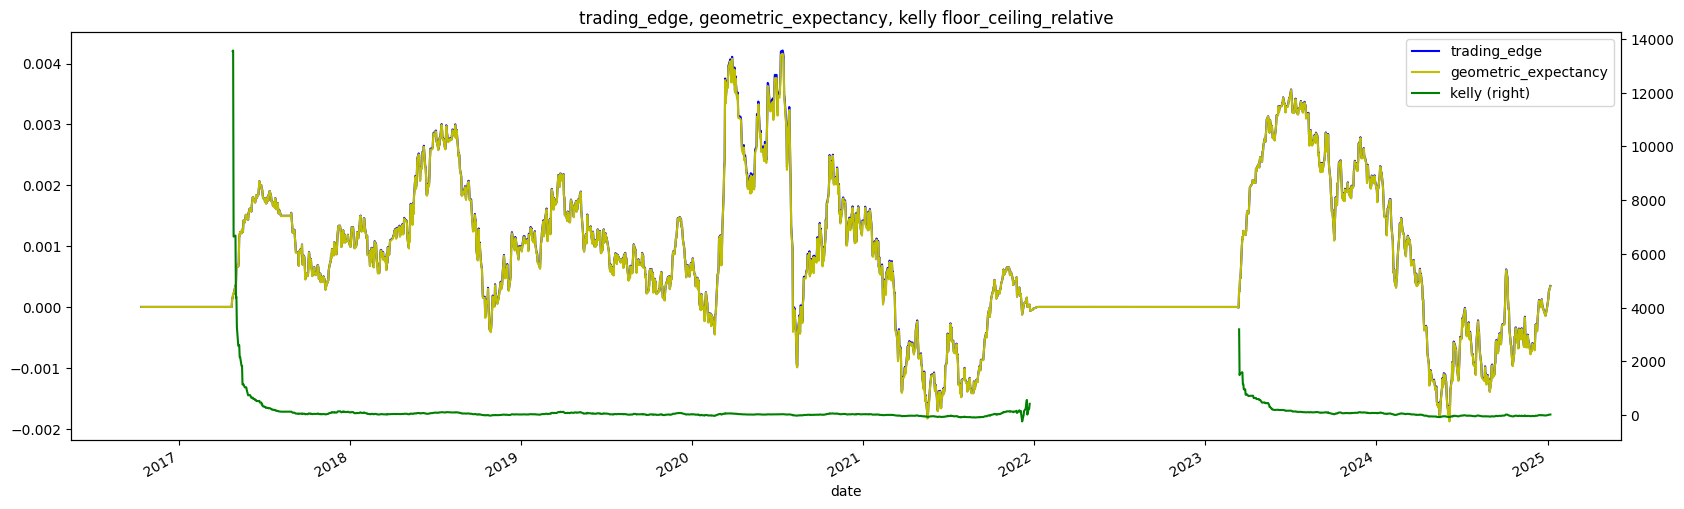

In [19]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_expectancies(df, window_exp, m)

In [20]:
starting_capital = 100000
lot = 100
mn = -0.0025
mx = -0.0075
# avg = (mn + mx) / 2
tolerance= -0.1
equal_weight = 0.05
span= 5
fx = 1

In [21]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_equity_risk(df, tolerance, mn, mx, span)  # call the function on the ith dataframe and signal  
    output_signals.append(output_df)  # append the output dataframe to the list  


In [22]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_shares(df, starting_capital, lot, mn, mx, tolerance, equal_weight, span, fx, s)
    output_signals.append(output_df)  # append the output dataframe to the list  


In [23]:
pd.concat(output_signals, axis=0)[['constant_risk', 'convex_risk', 'concave_risk']]

constant_risk  convex_risk  concave_risk
date                                                         
2016-01-04 08:00:00       0.006120     0.009180      0.009180
2016-01-05 08:00:00       0.006190     0.009285      0.009285
2016-01-06 08:00:00       0.006150     0.008734      0.009221
2016-01-07 08:00:00       0.006215     0.008995      0.009285
2016-01-08 08:00:00       0.006175     0.008680      0.009248
...                            ...          ...           ...
2024-12-27 08:00:00       0.010650     0.007083      0.014546
2024-12-30 08:00:00       0.010700     0.007214      0.014631
2025-01-02 08:00:00       0.010950     0.008123      0.015091
2025-01-03 08:00:00       0.010850     0.008465      0.015226
2025-01-06 16:35:27       0.010800     0.008502      0.015239

[41238 rows x 3 columns]

In [24]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'constant','concave','convex','equal_weight', 'tt_PL_cum_fx']]
output_df_sel.groupby('method').last() 

constant        concave         convex  \
method                                                                
breakout                102734.200597  104101.300895  104101.300895   
ema                     101145.797205  101752.395725  101752.395725   
floor_ceiling           113761.000000  120439.000000  116536.000000   
floor_ceiling_relative   96149.000000   95410.000000   97769.000000   
sma                     100938.397646  101435.196400  101435.196400   
turtle                   99444.598544   98896.997869   98152.448261   

                         equal_weight  tt_PL_cum_fx  
method                                               
breakout                102473.800540      0.651000  
ema                     101314.296794      0.336999  
floor_ceiling           106248.000000      1.600000  
floor_ceiling_relative   98444.000000     -0.460000  
sma                     101076.397300      0.275999  
turtle                   99777.798414      0.052500

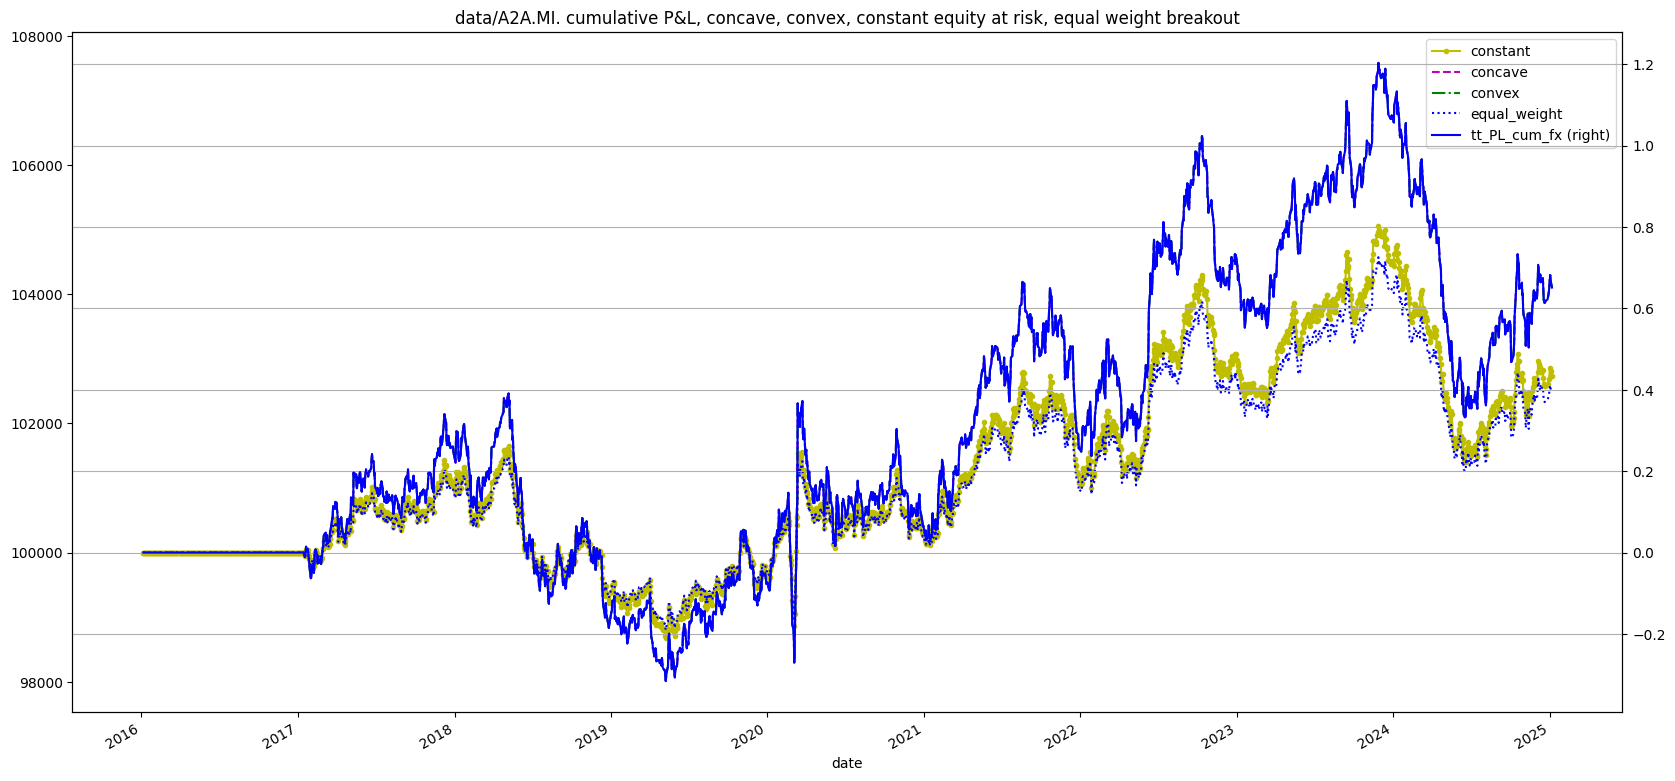

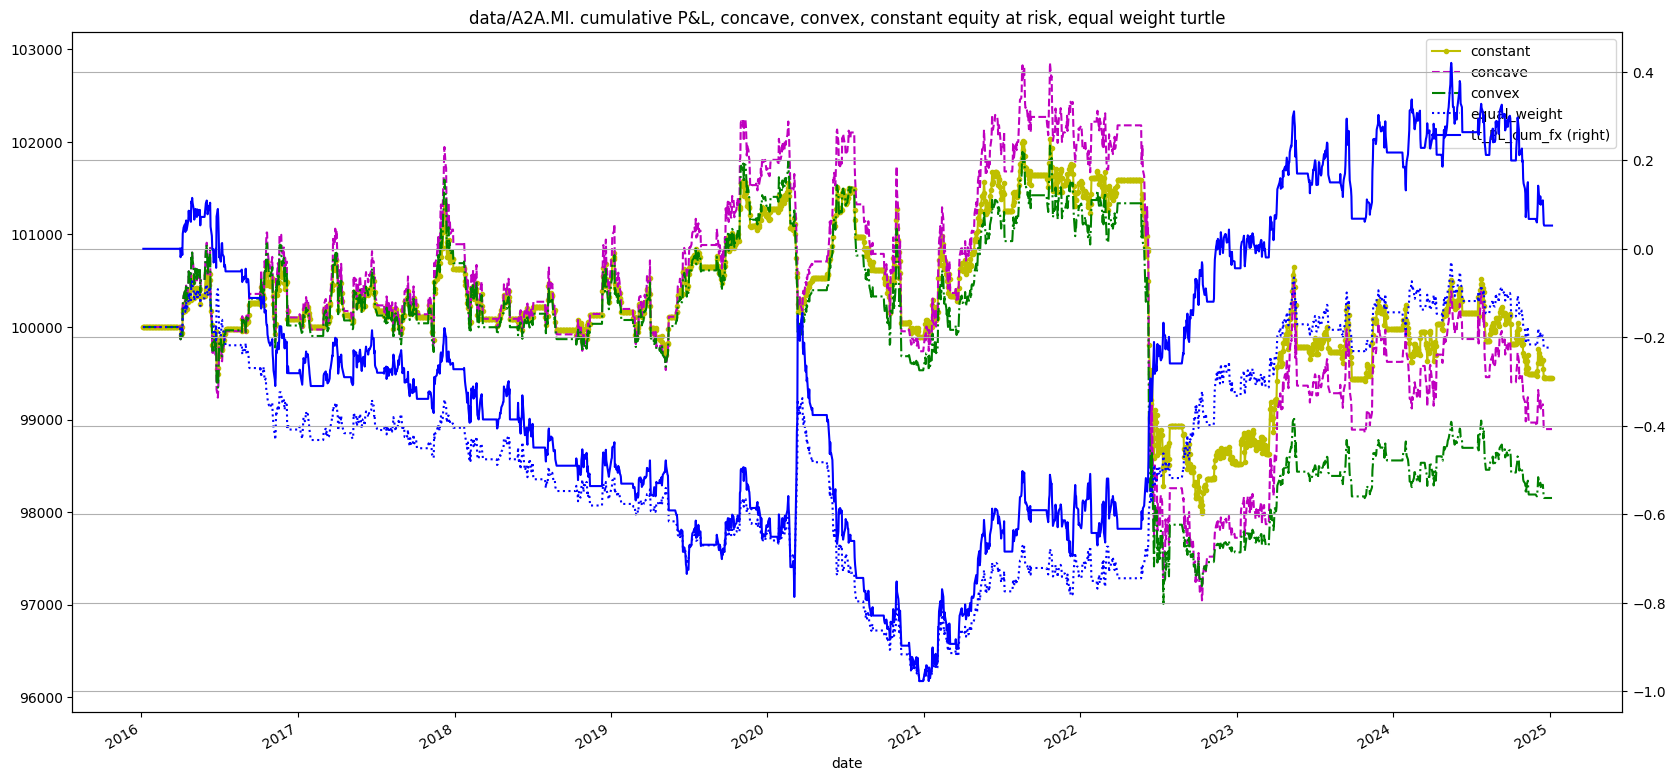

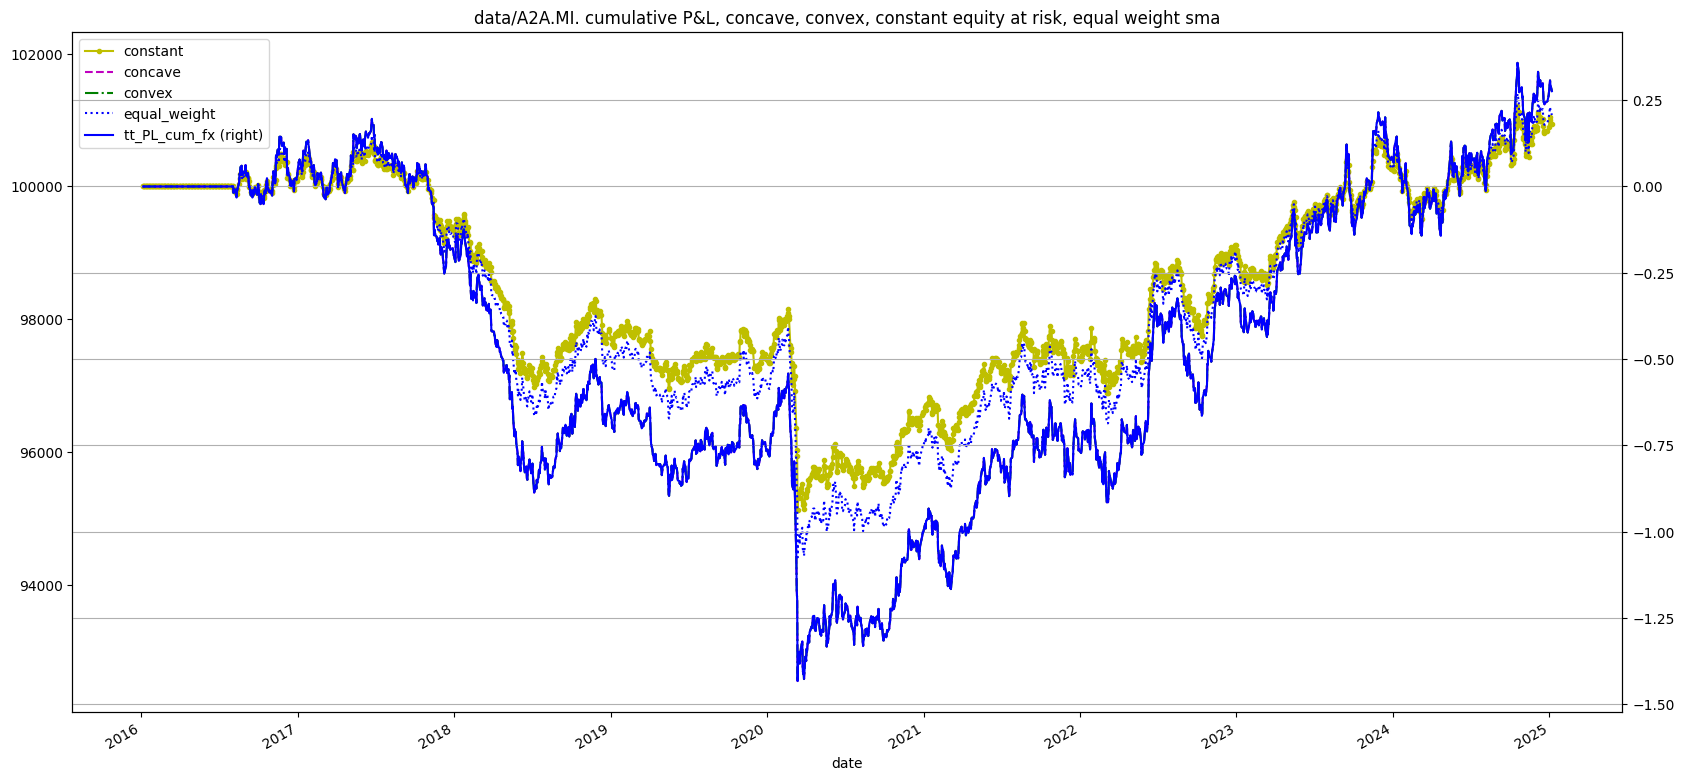

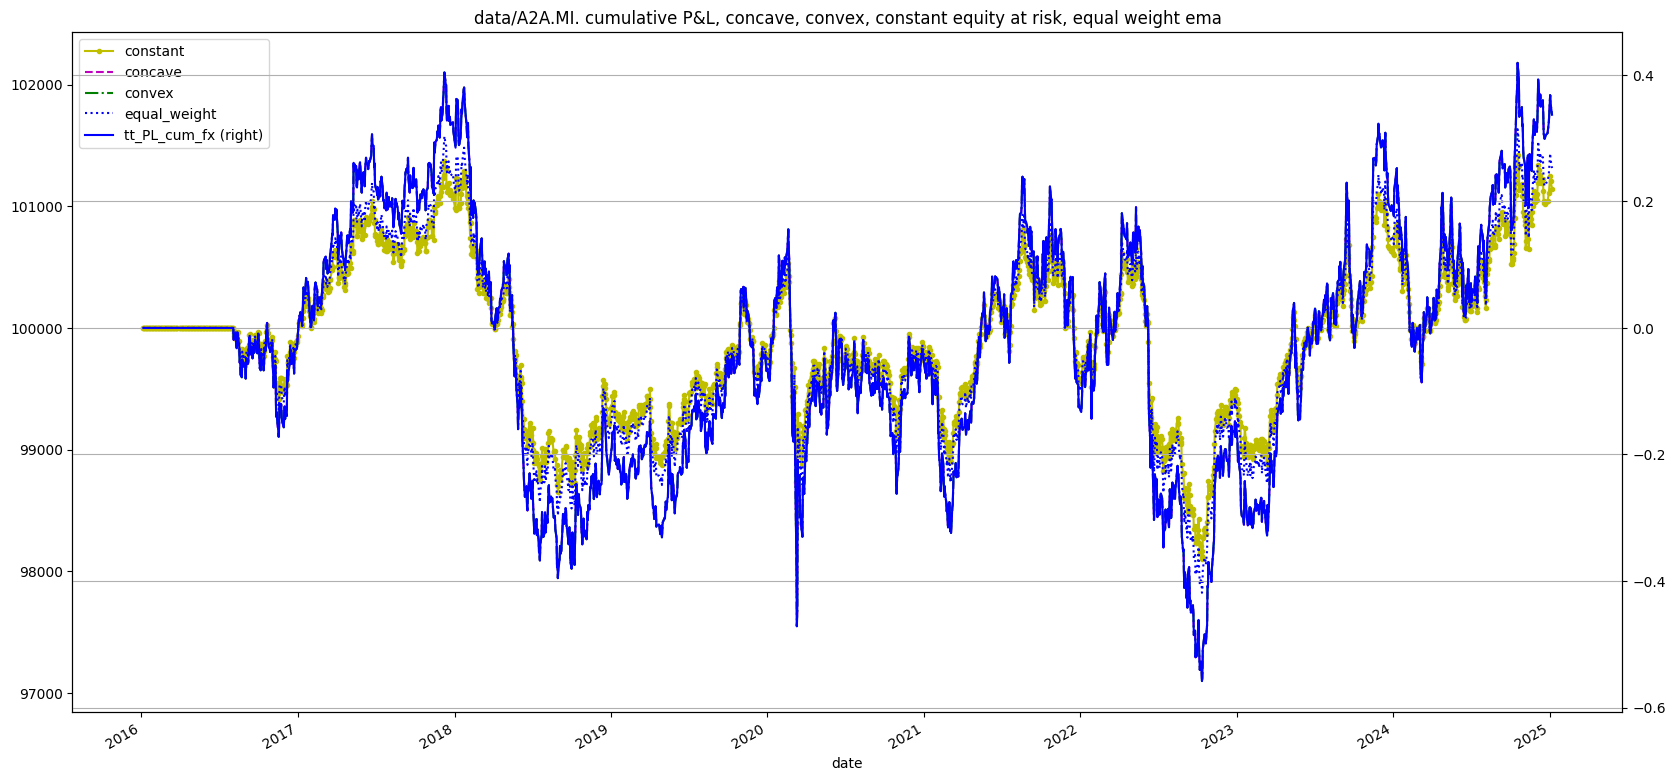

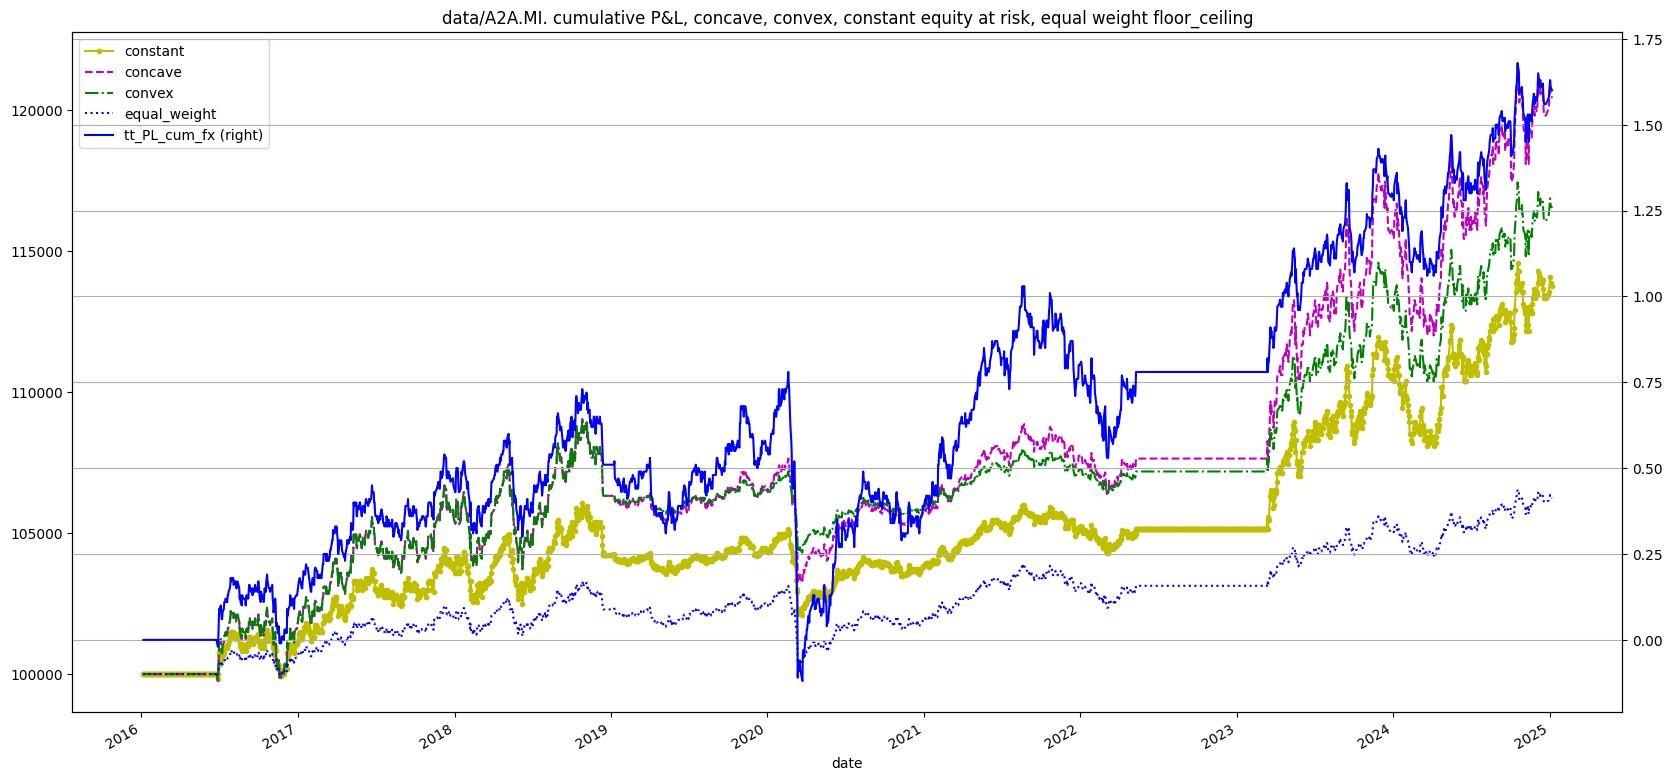

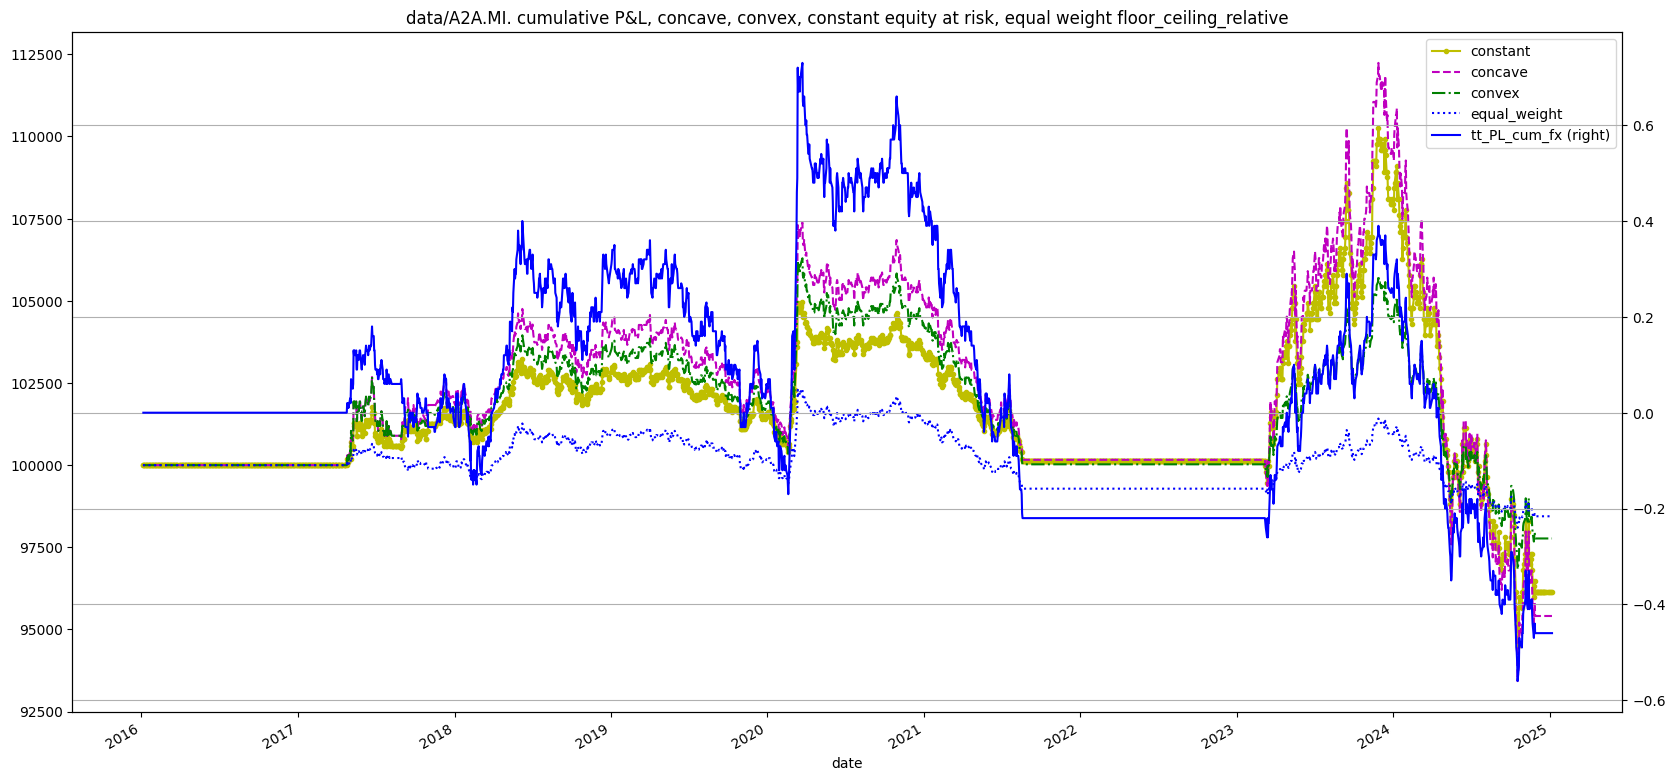

In [25]:
for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    # print(df.tail())
    plot_equity_amount(df, ticker, m)

In [26]:
# # determining the name of the file
# file_name = 'A2A_unt.xlsx'
 
# # saving the excel
# df.to_excel(file_name)

output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'shs_eql','shs_fxd','shs_ccv','shs_cvx']]
output_df_sel.groupby('method').last() 

shs_eql  shs_fxd  shs_ccv  shs_cvx
method                                                    
breakout                -2300.0   4200.0   6300.0   6300.0
ema                     -2300.0   3400.0   5200.0   5200.0
floor_ceiling           -2400.0  10500.0  15600.0  11400.0
floor_ceiling_relative  -2200.0  16600.0  19800.0   9400.0
sma                     -2300.0   3400.0   5200.0   5200.0
turtle                  -2300.0   3500.0   4700.0   2500.0

In [27]:
df_fc.columns

Index(['date', 'volume', 'high', 'low', 'open', 'close', 'adj_close', 'ticker',
       'ropen', 'rhigh', 'rlow', 'rclose', 'hi1', 'lo1', 'hi2', 'lo2', 'hi3',
       'lo3', 'hi4', 'lo4', 'rt', 'rg', 'flr', 'clg', 'rg_ch', 'rh1', 'rl1',
       'rh2', 'rl2', 'rh3', 'rl3', 'rh4', 'rl4', 'rrt', 'rrg', 'rflr', 'rclg',
       'rrg_ch'],
      dtype='object')

In [28]:
df_fc[df_fc['clg'].notna()][['date', 'clg']].tail(1)

date   clg
1431 2021-08-20 07:00:00  1.96

In [29]:

df_fc[df_fc['flr'].notna()][['date', 'flr']].tail(1)

date   flr
1725 2022-10-13 07:00:00  0.94

In [30]:

df_fc[df_fc['hi3'].notna()][['date', 'hi3']].tail(1)

date   hi3
2239 2024-10-18 07:00:00  2.25

In [31]:
df_fc[df_fc['lo3'].notna()][['date', 'lo3']].tail(1)

date  lo3
2252 2024-11-06 08:00:00  2.0

In [32]:

price = 2.021
stop_loss = 1.61
qty = 1000
r_multiplier = 1.1
r_multiplier
pt = target_price(price, stop_loss, r_multiplier)
exit_qty = partial_exit(qty, r_multiplier)
print('target price', pt,'exit_quantity',exit_qty)

target price 2.4730999999999996 exit_quantity 909.090909090909


In [33]:
cost = 1.8945
price = cost * 1.08
qty * (cost - stop_loss) / (price - stop_loss)

652.4331514011832

In [34]:
average_true_range(df_fc,'high','low','close', n= 63)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2286    0.037460
2287    0.037302
2288    0.037778
2289    0.037937
2290    0.037937
Length: 2291, dtype: float64

In [35]:
df_fc.tail()

date   volume  high   low  open  close  adj_close  ticker  \
2286 2024-12-27 08:00:00  3288664  2.13  2.10  2.12   2.13       2.13  A2A.MI   
2287 2024-12-30 08:00:00  4199469  2.15  2.12  2.12   2.14       2.14  A2A.MI   
2288 2025-01-02 08:00:00  4848444  2.19  2.15  2.16   2.19       2.19  A2A.MI   
2289 2025-01-03 08:00:00  3760002  2.19  2.16  2.19   2.17       2.17  A2A.MI   
2290 2025-01-06 16:35:27  6386942  2.18  2.14  2.18   2.16       2.16  A2A.MI   

      ropen  rhigh  ...  rl2  rh3  rl3  rh4  rl4  rrt  rrg  rflr  rclg  rrg_ch  
2286   1.29   1.29  ...  NaN  NaN  NaN  NaN  NaN  NaN  0.0   NaN   NaN    1.34  
2287   1.29   1.30  ...  NaN  NaN  NaN  NaN  NaN  NaN  0.0   NaN   NaN    1.34  
2288   1.30   1.32  ...  NaN  NaN  NaN  NaN  NaN  NaN  0.0   NaN   NaN    1.34  
2289   1.33   1.33  ...  NaN  NaN  NaN  NaN  NaN  NaN  0.0   NaN   NaN    1.34  
2290   1.30   1.30  ...  NaN  NaN  NaN  NaN  NaN  NaN  0.0   NaN   NaN    1.34  

[5 rows x 38 columns]

In [36]:
df_fc['peak_eqty'] =df_fc['close'].cummax()